<div style="background-color: #f9f9fc; color: #333366; border-radius: 12px; margin: 20px auto; padding: 20px; border: 2px solid #ff4c4c; max-width: 1000px; font-family: Arial, sans-serif; line-height: 1.6;">
  <h2 style="text-align: center; color: #333366;">Sheep Detection using YOLOv8</h2>

## Step # 01 Install the Ultralytics Package

In [2]:
import os
os.environ['NO_ALBUMENTATIONS_UPDATE'] = '1'

In [3]:
!nvidia-smi

Mon Jan 13 10:07:20 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.35.03              Driver Version: 560.35.03      CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla P100-PCIE-16GB           Off |   00000000:00:04.0 Off |                    0 |
| N/A   38C    P0             27W /  250W |       0MiB /  16384MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [4]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 906.8/906.8 kB 21.9 MB/s eta 0:00:0000:01


In [5]:
!pip install -U albumentations

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.1/80.1 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.0/66.0 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 273.9/273.9 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 632.7/632.7 kB 26.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 304.5/304.5 kB 17.7 MB/s eta 0:00:00
  Attempting uninstall: albucore
    Found existing installation: albucore 0.0.16
    Uninstalling albucore-0.0.16:
      Successfully uninstalled albucore-0.0.16
  Attempting uninstall: albumentations
    Found existing installation: albumentations 1.4.15
    Uninstalling albumentations-1.4.15:
      Successfully uninstalled albumentations-1.4.15


In [6]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.59 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Setup complete ✅ (4 CPUs, 31.4 GB RAM, 6037.7/8062.4 GB disk)


In [7]:
from ultralytics import YOLO
from IPython.display import display, Image

## Step # 02 Download Dataset from Roboflow

In [8]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="mKLo8Jlj6hy8KqEpN3qg")
project = rf.workspace("huangdaochan").project("sheep-8aq3a-sjhm6")
version = project.version(1)
dataset = version.download("yolov8")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 3.4 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Sheep-1 in yolov8:: 100%|██████████| 4024/4024 [00:00<00:00, 8741.07it/s]


## Step # 03 Examine Training Results

In [9]:
dataset.location

'/kaggle/working/Sheep-1'

In [10]:
!yolo task=detect mode=train data=/kaggle/working/Sheep-1/data.yaml model=yolov8n.pt epochs=5 imgsz=640 name=custom_yolo11n

100%|███████████████████████████████████████| 6.25M/6.25M [00:00<00:00, 117MB/s]
Ultralytics 8.3.59 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/kaggle/working/Sheep-1/data.yaml, epochs=5, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=custom_yolo11n, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_

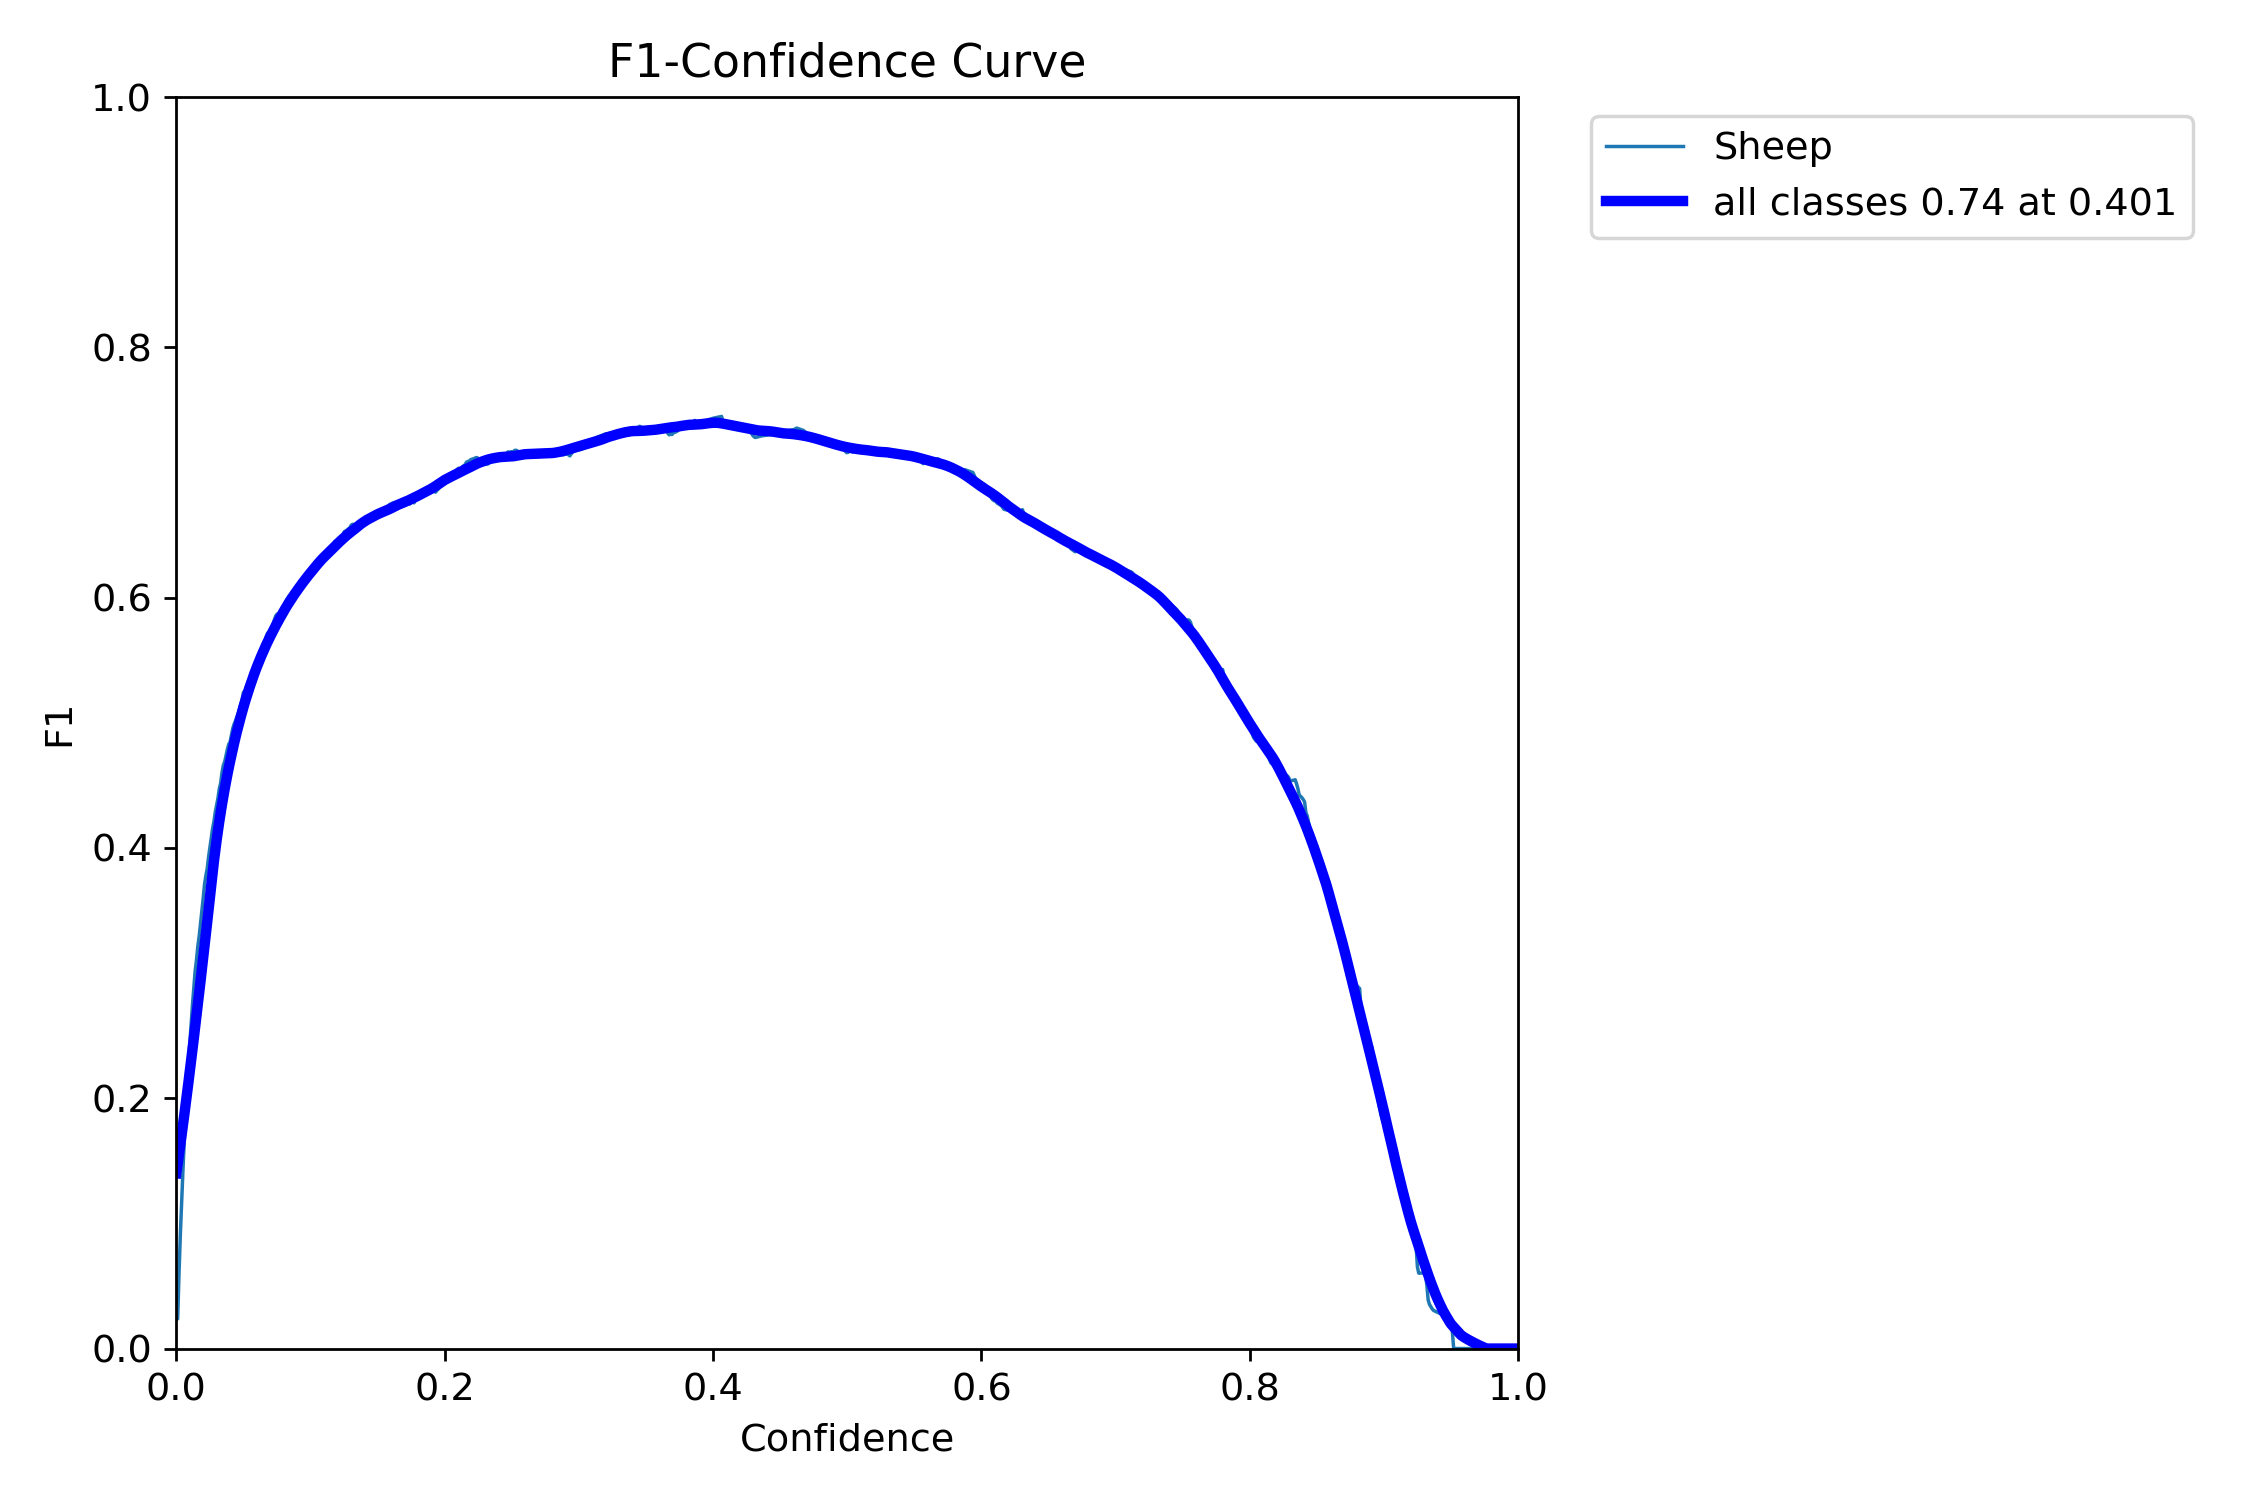

In [12]:
Image("/kaggle/working/runs/detect/custom_yolo11n/F1_curve.png", height=700, width=9000)

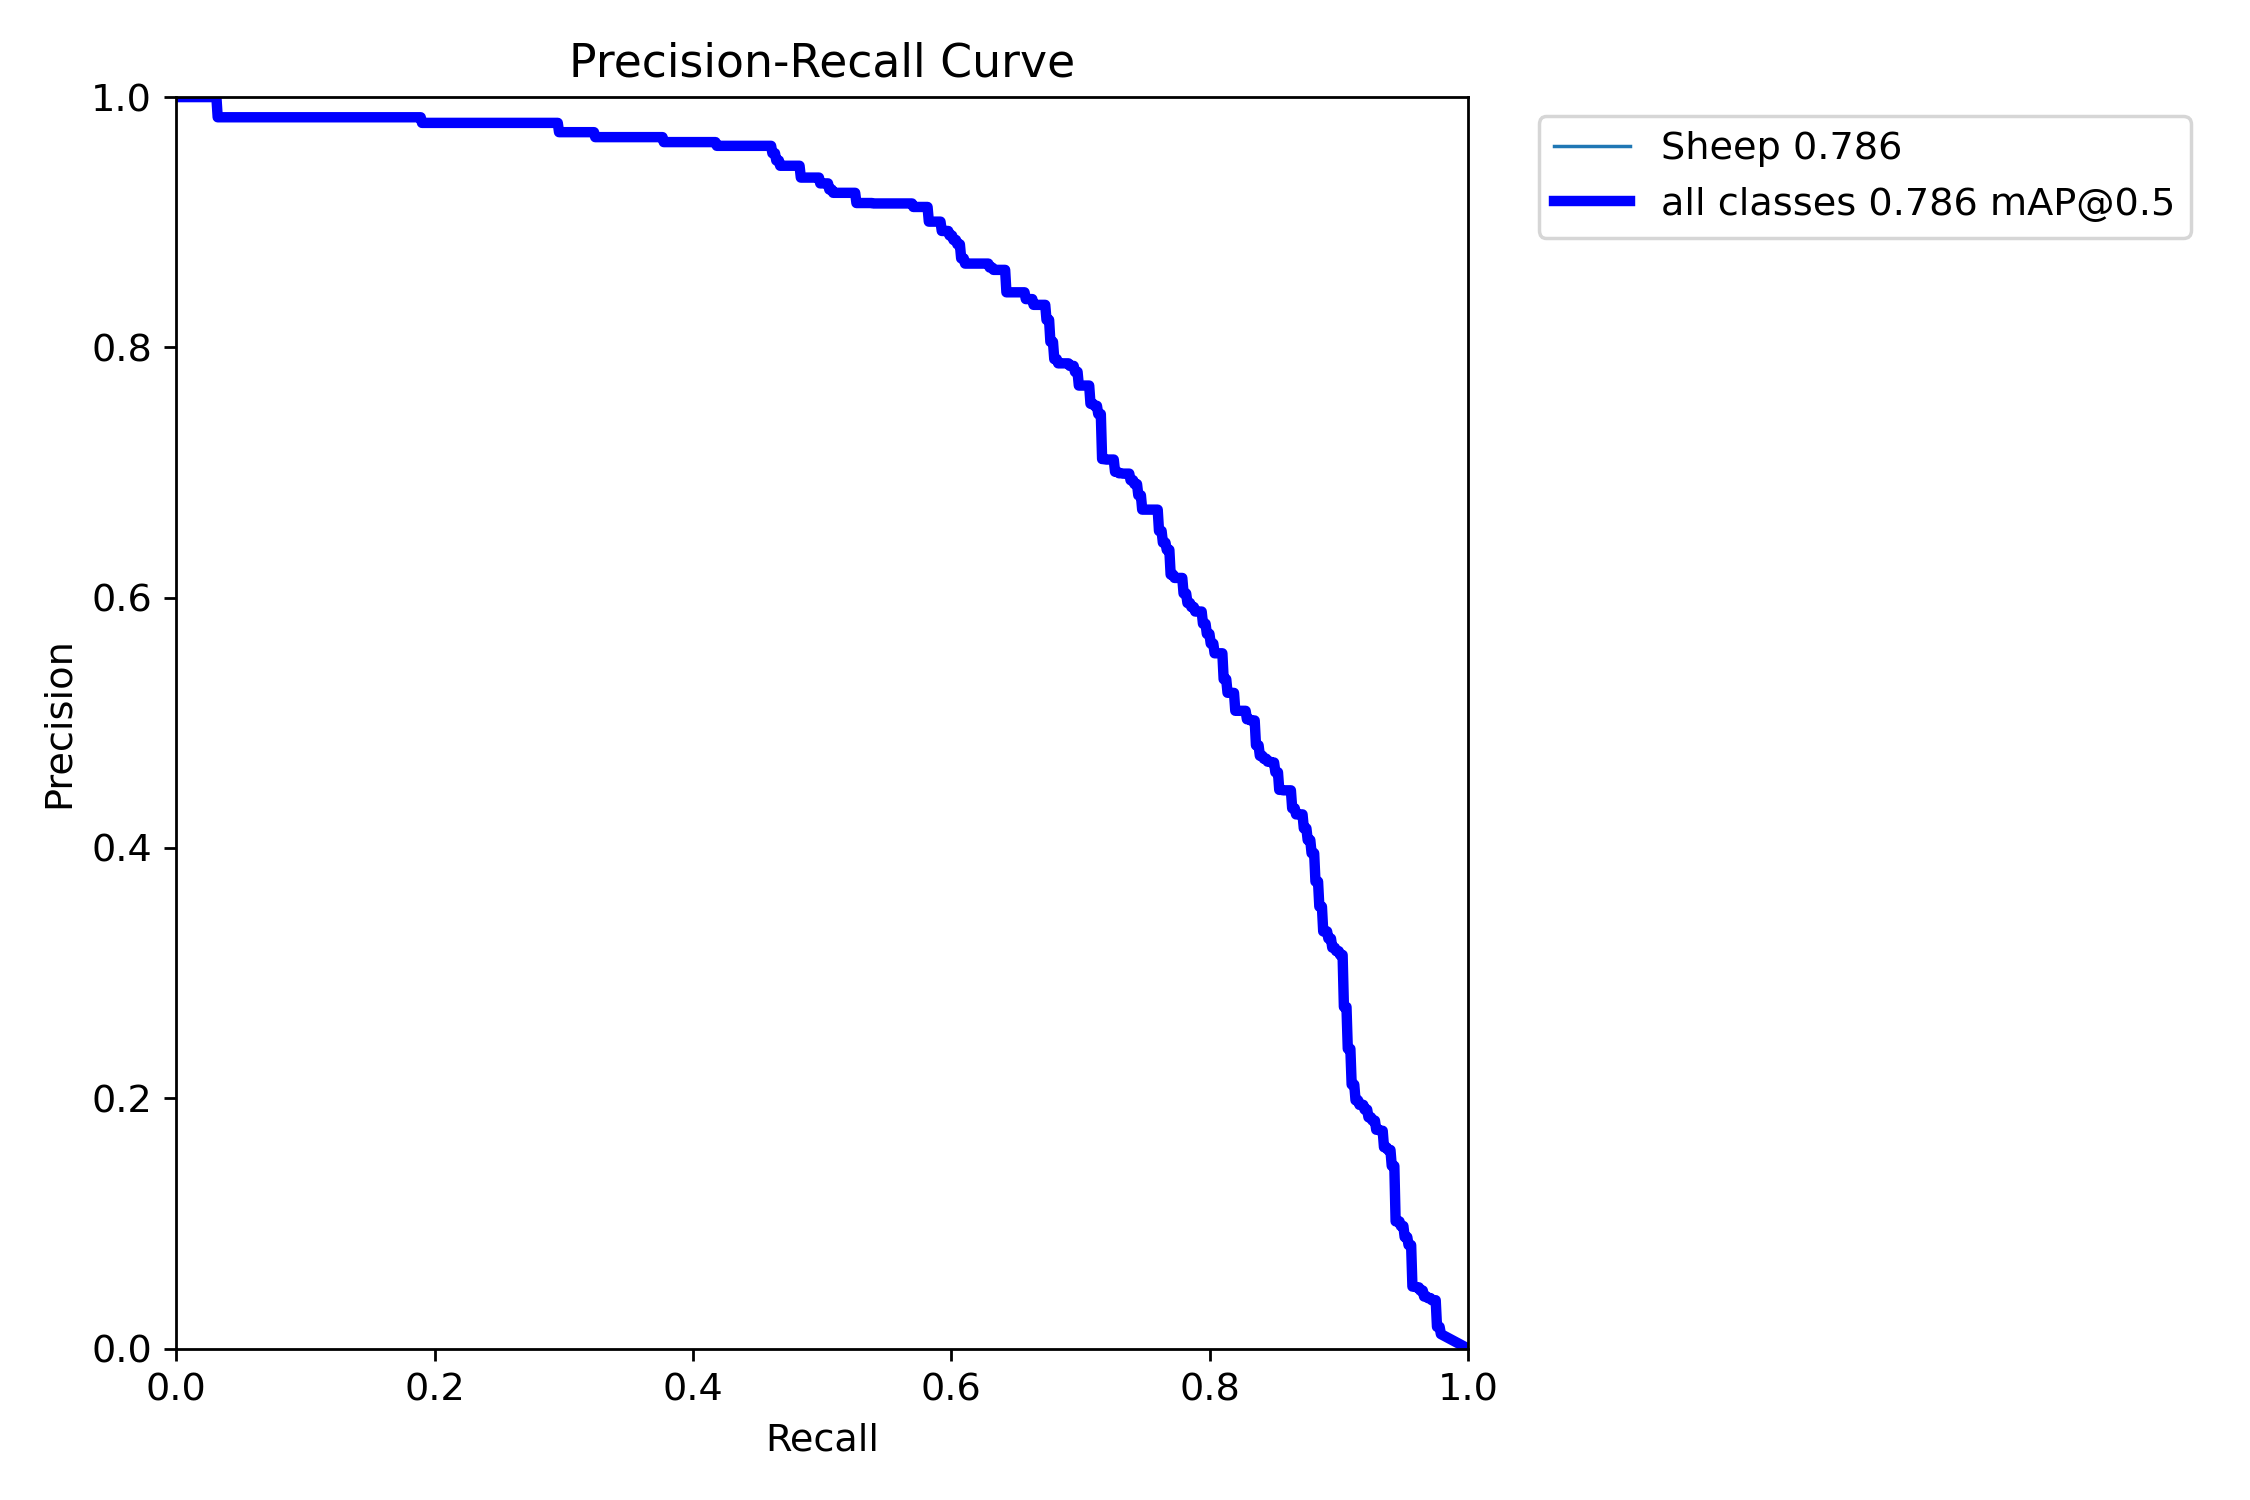

In [13]:
Image("/kaggle/working/runs/detect/custom_yolo11n/PR_curve.png", height=700, width=9000)

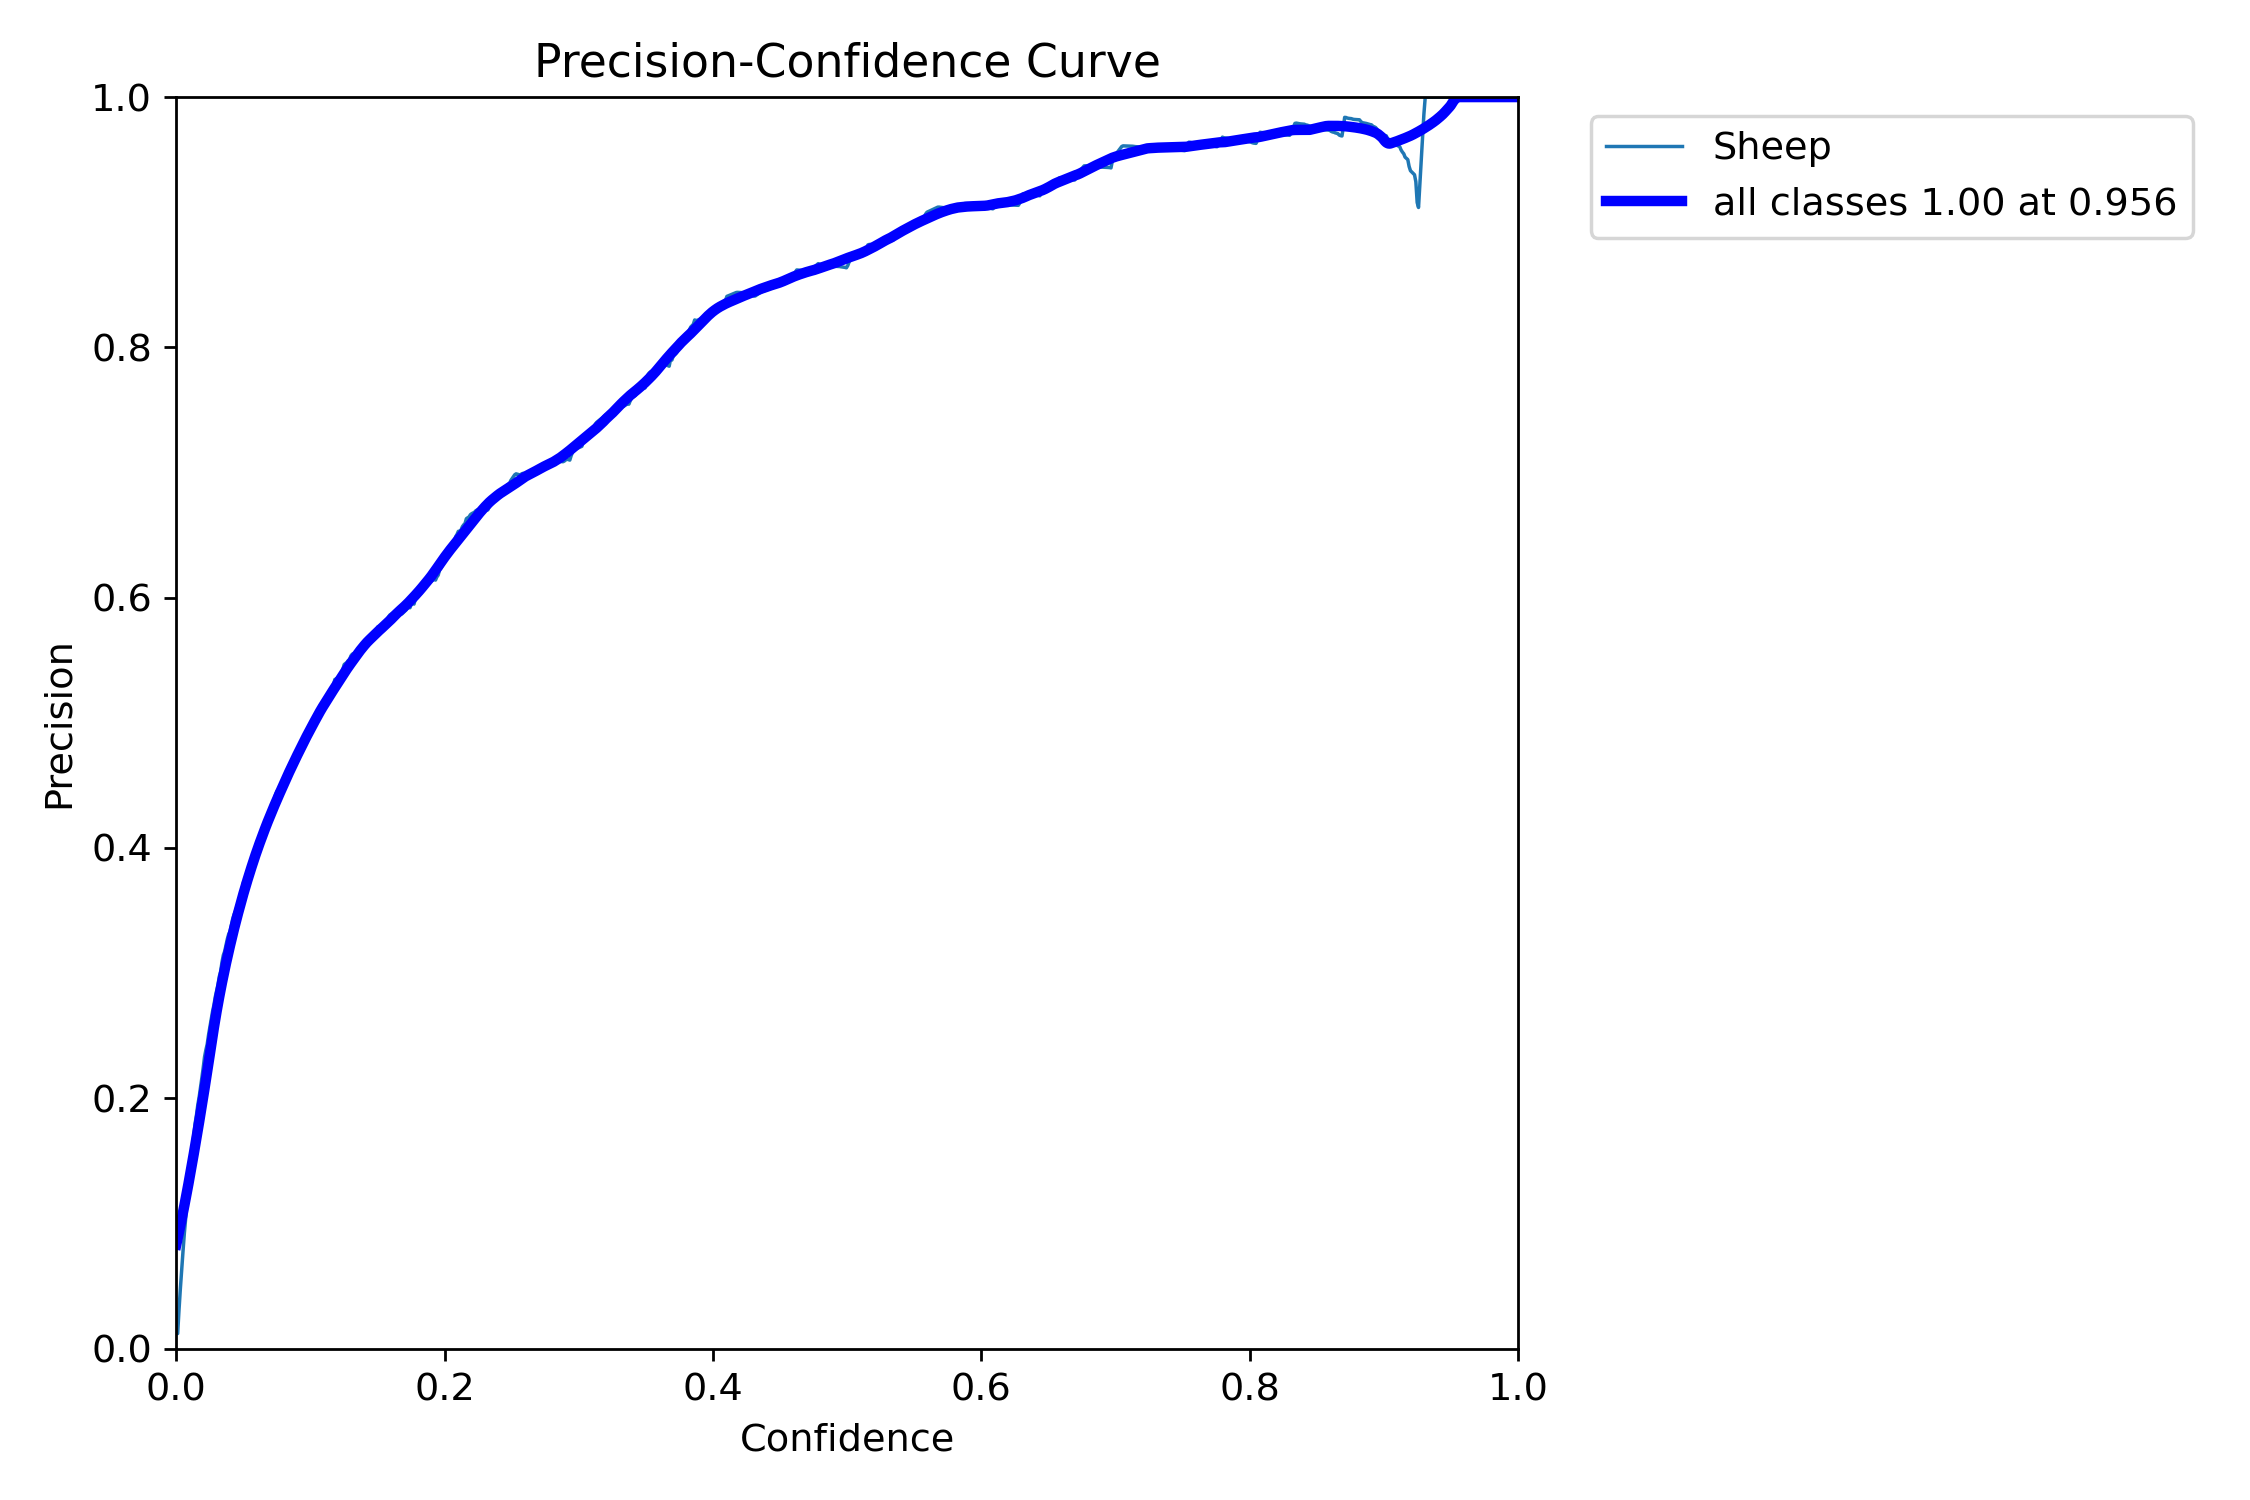

In [14]:
Image("/kaggle/working/runs/detect/custom_yolo11n/P_curve.png", height=700, width=9000)

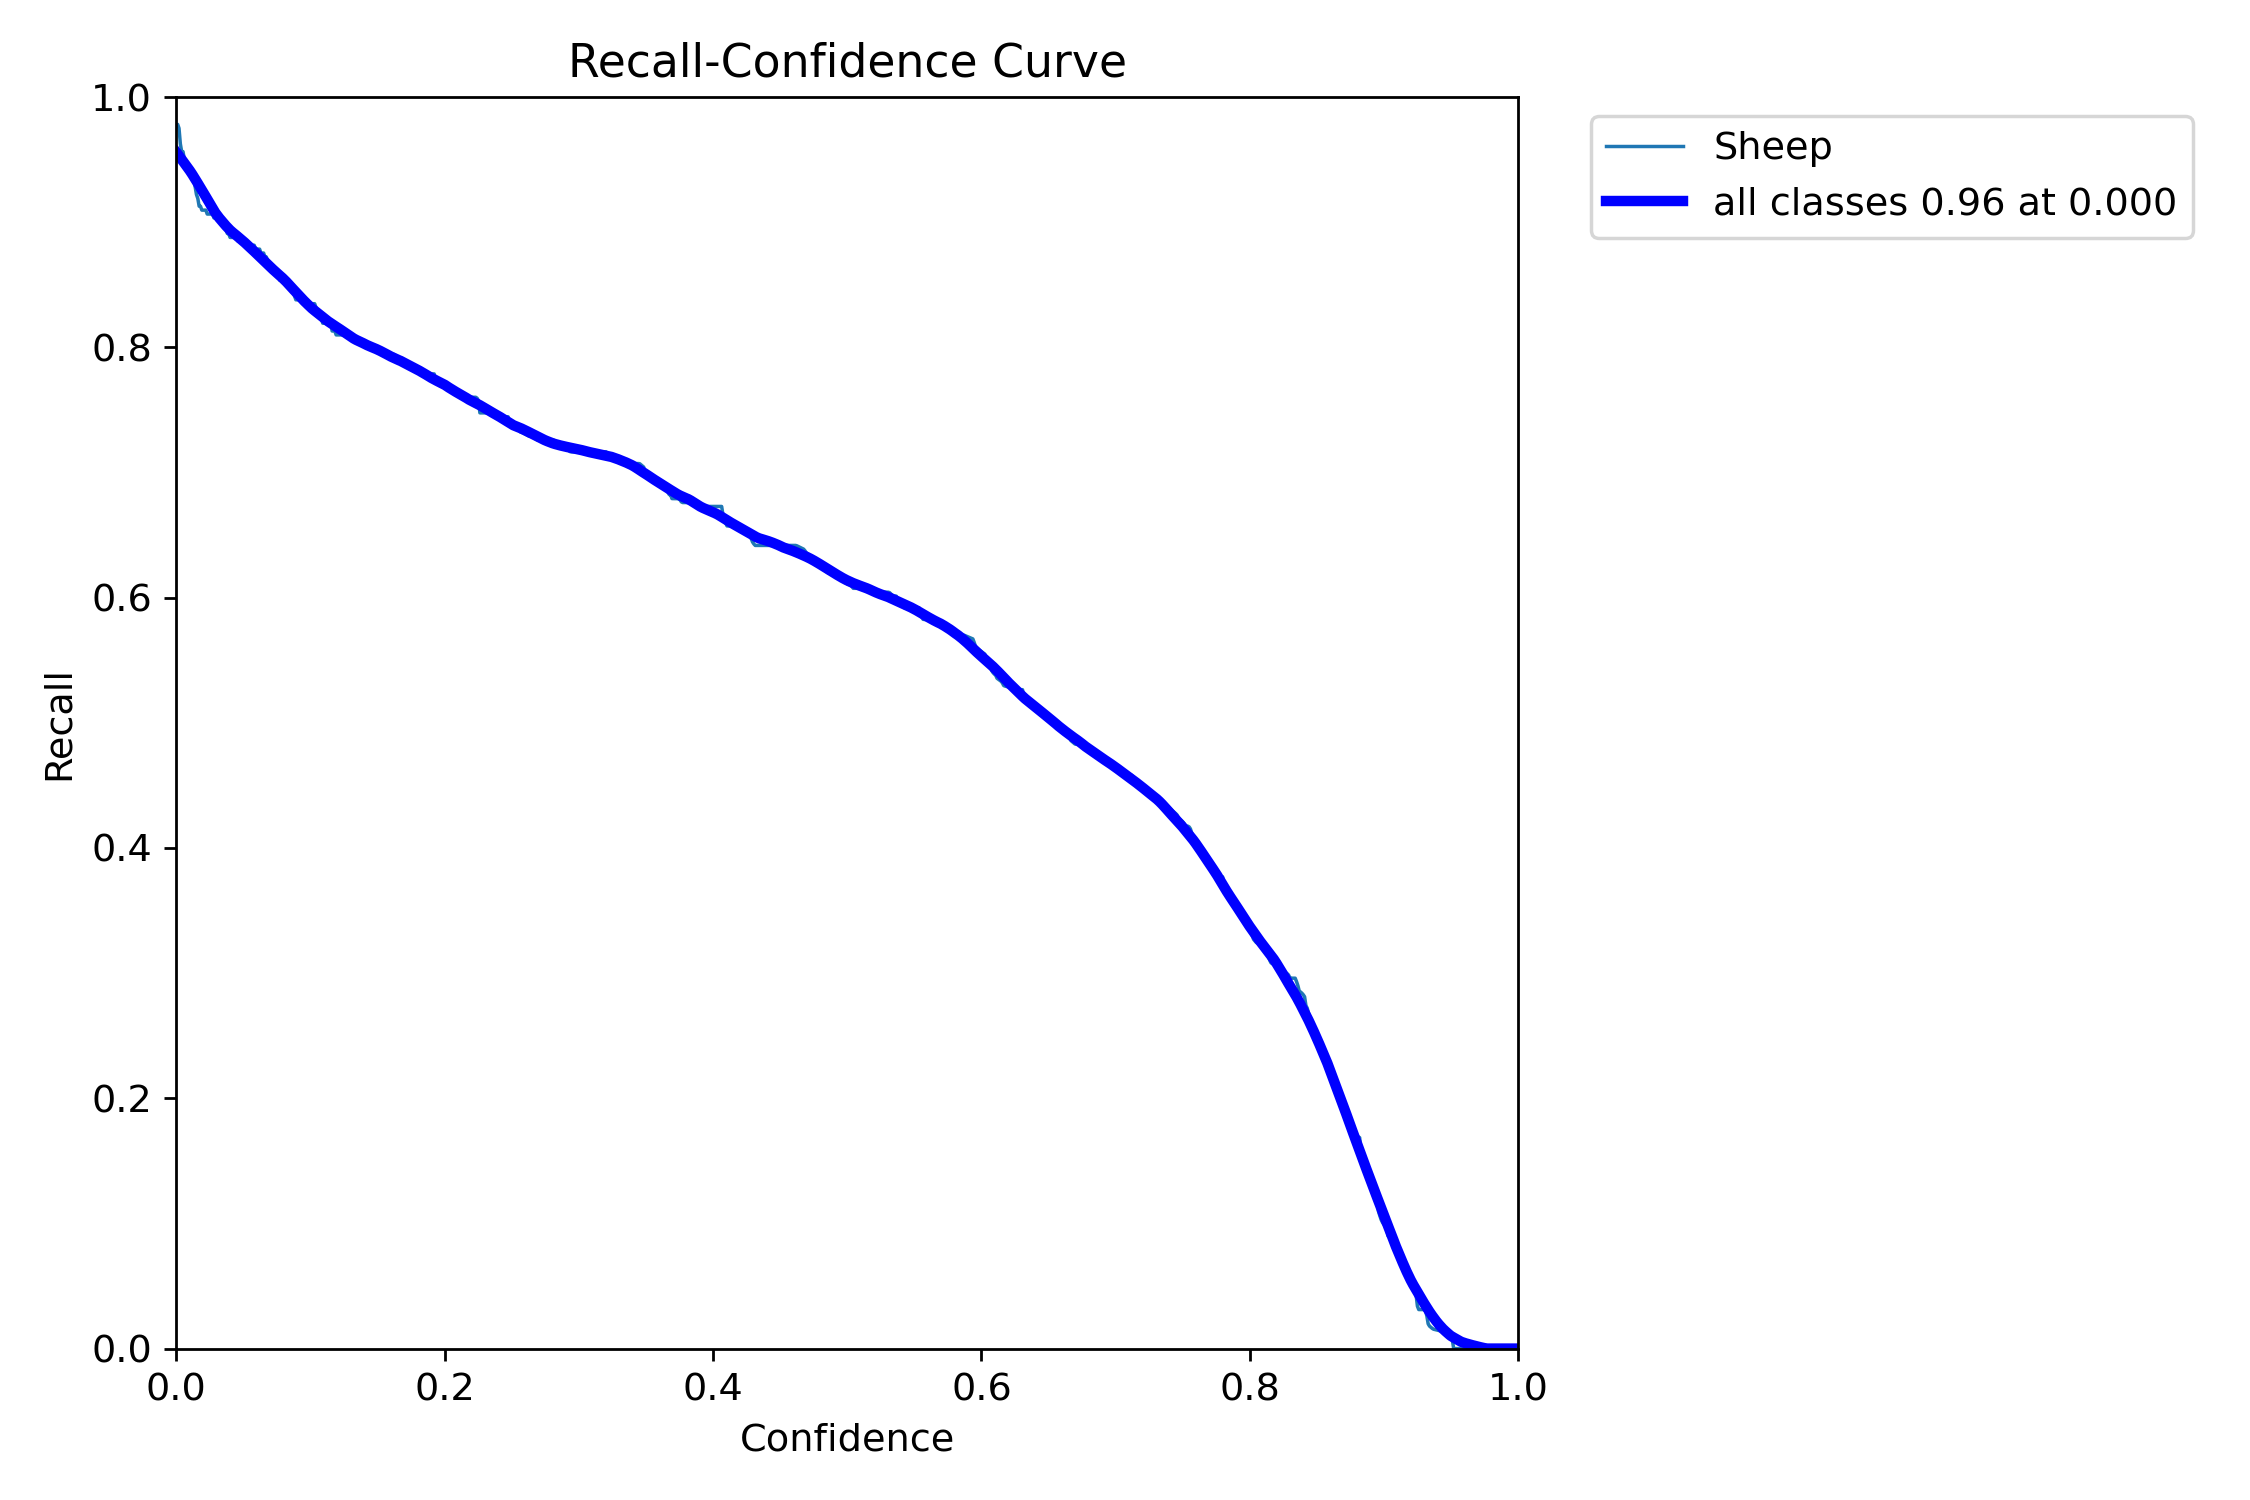

In [15]:
Image("/kaggle/working/runs/detect/custom_yolo11n/R_curve.png", height=700, width=9000)

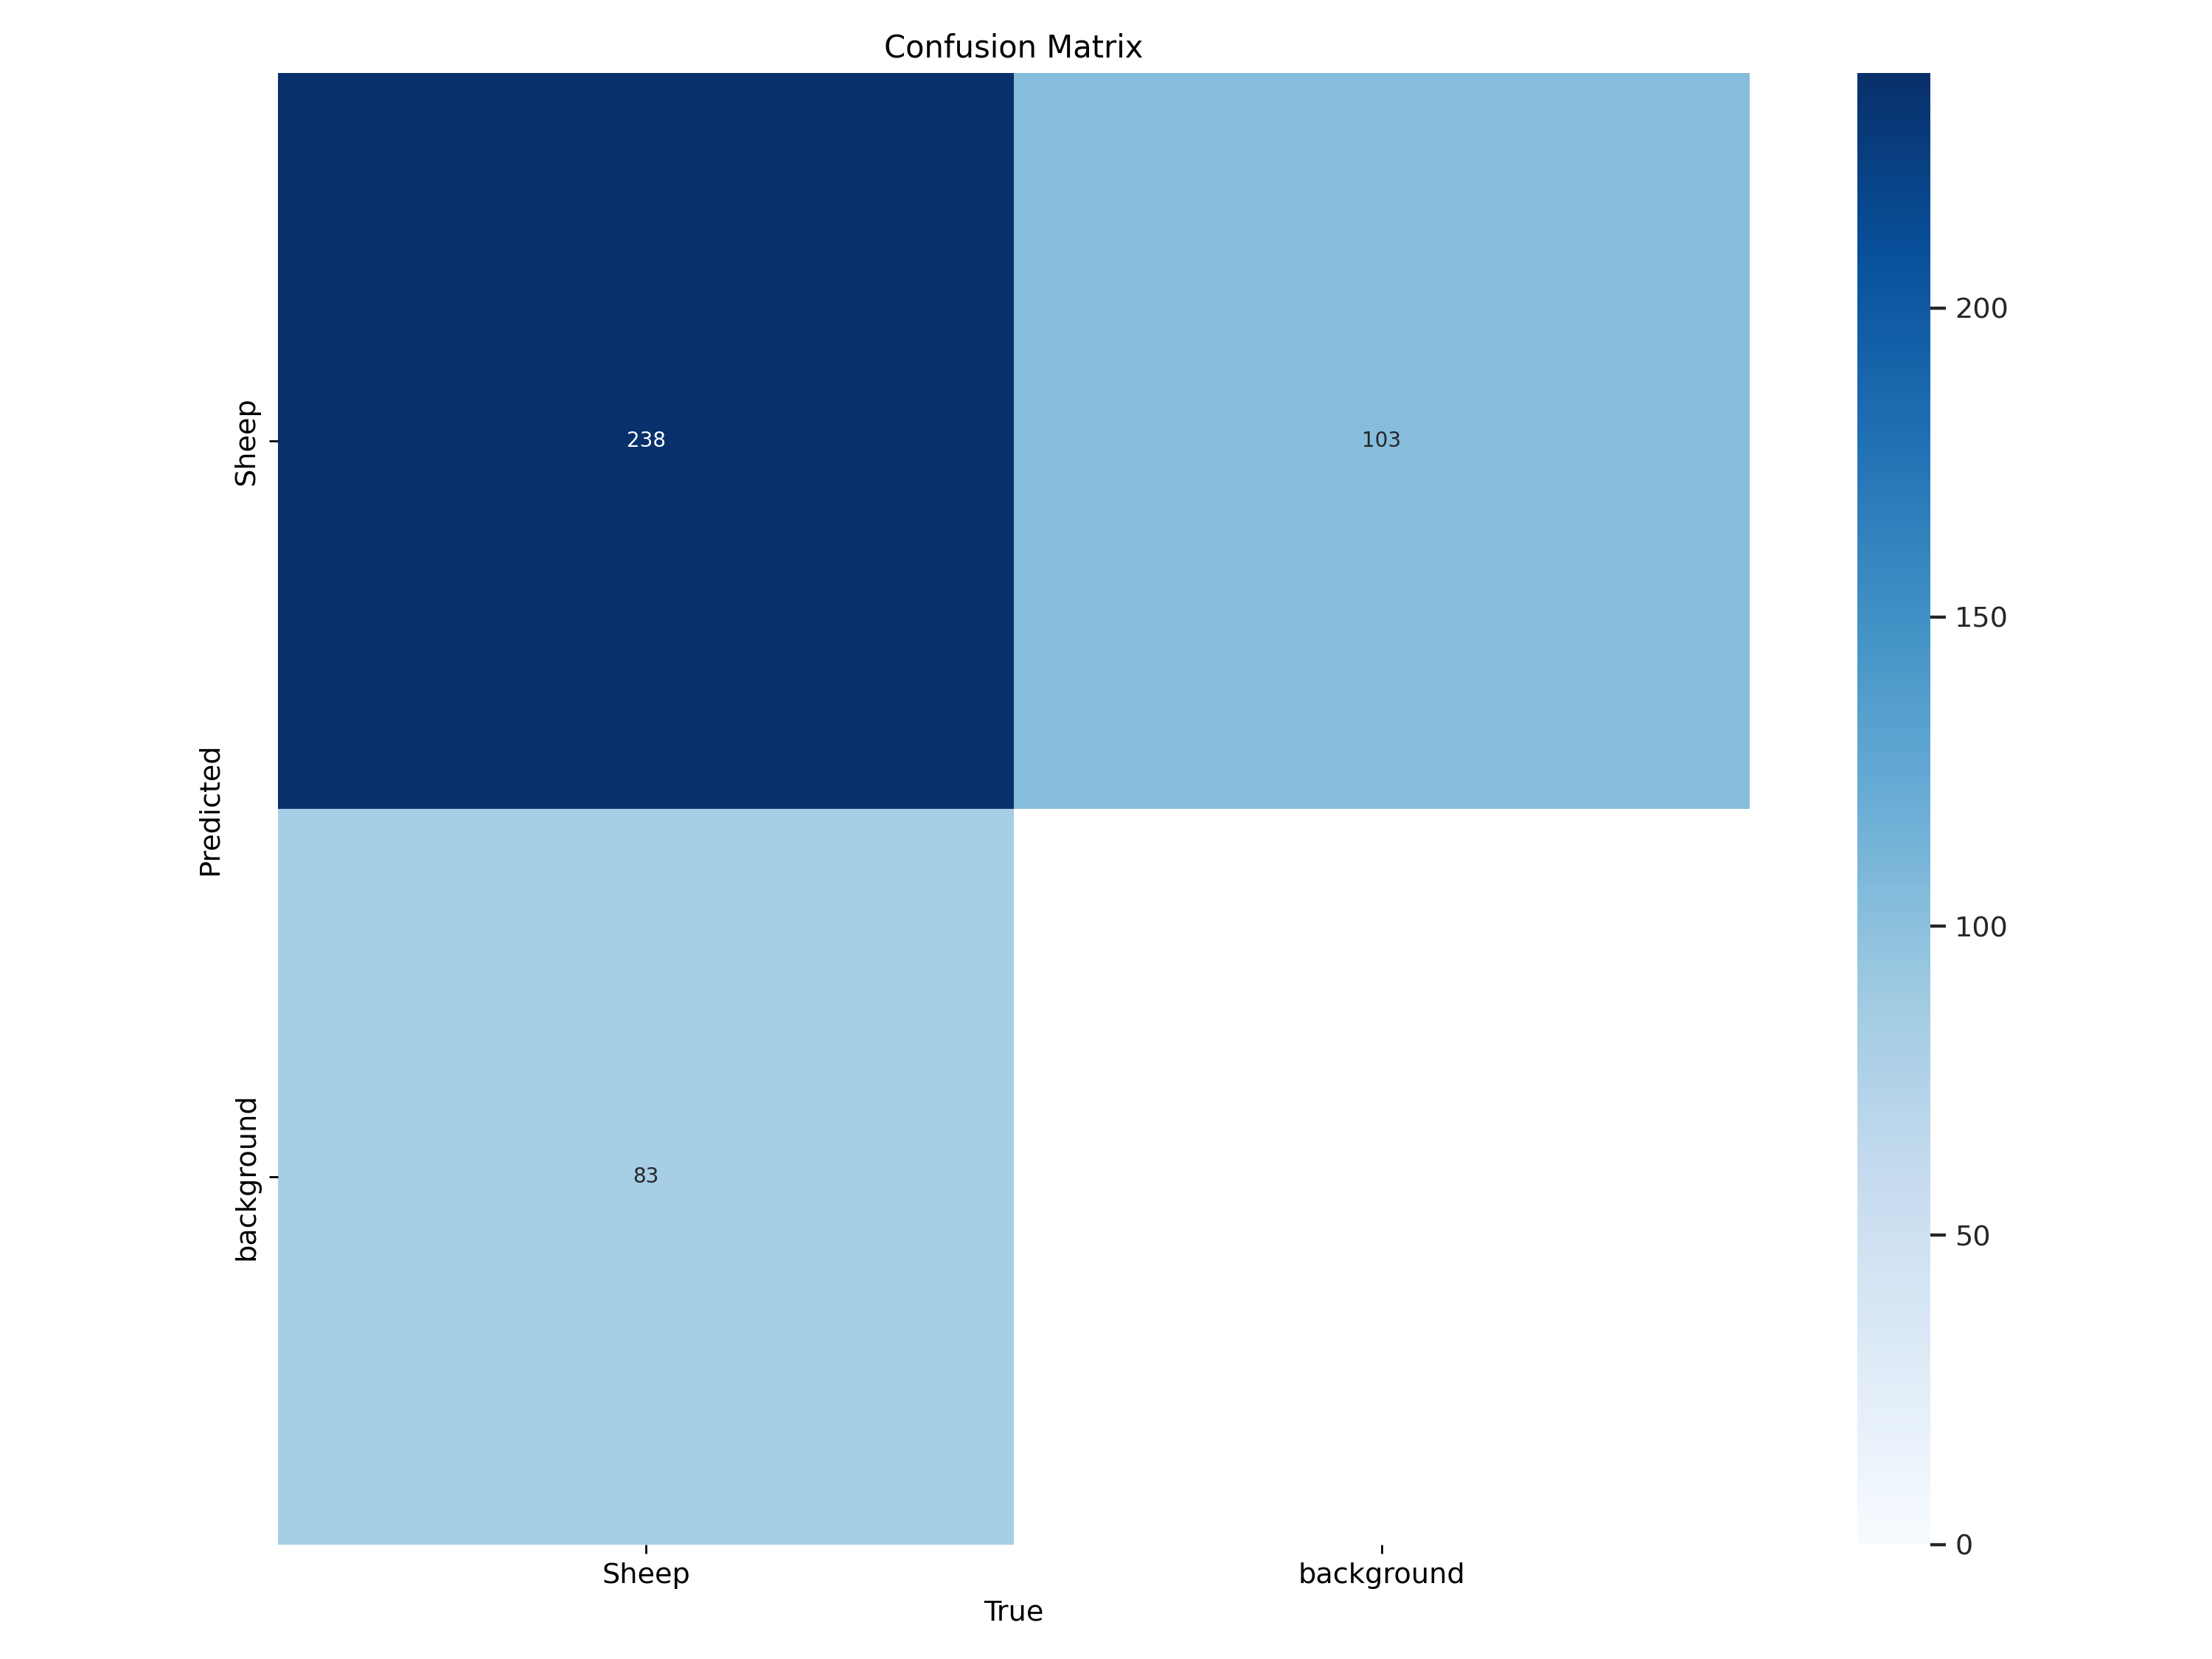

In [21]:
Image("/kaggle/working/runs/detect/custom_yolo11n/confusion_matrix.png", height=600, width=800)

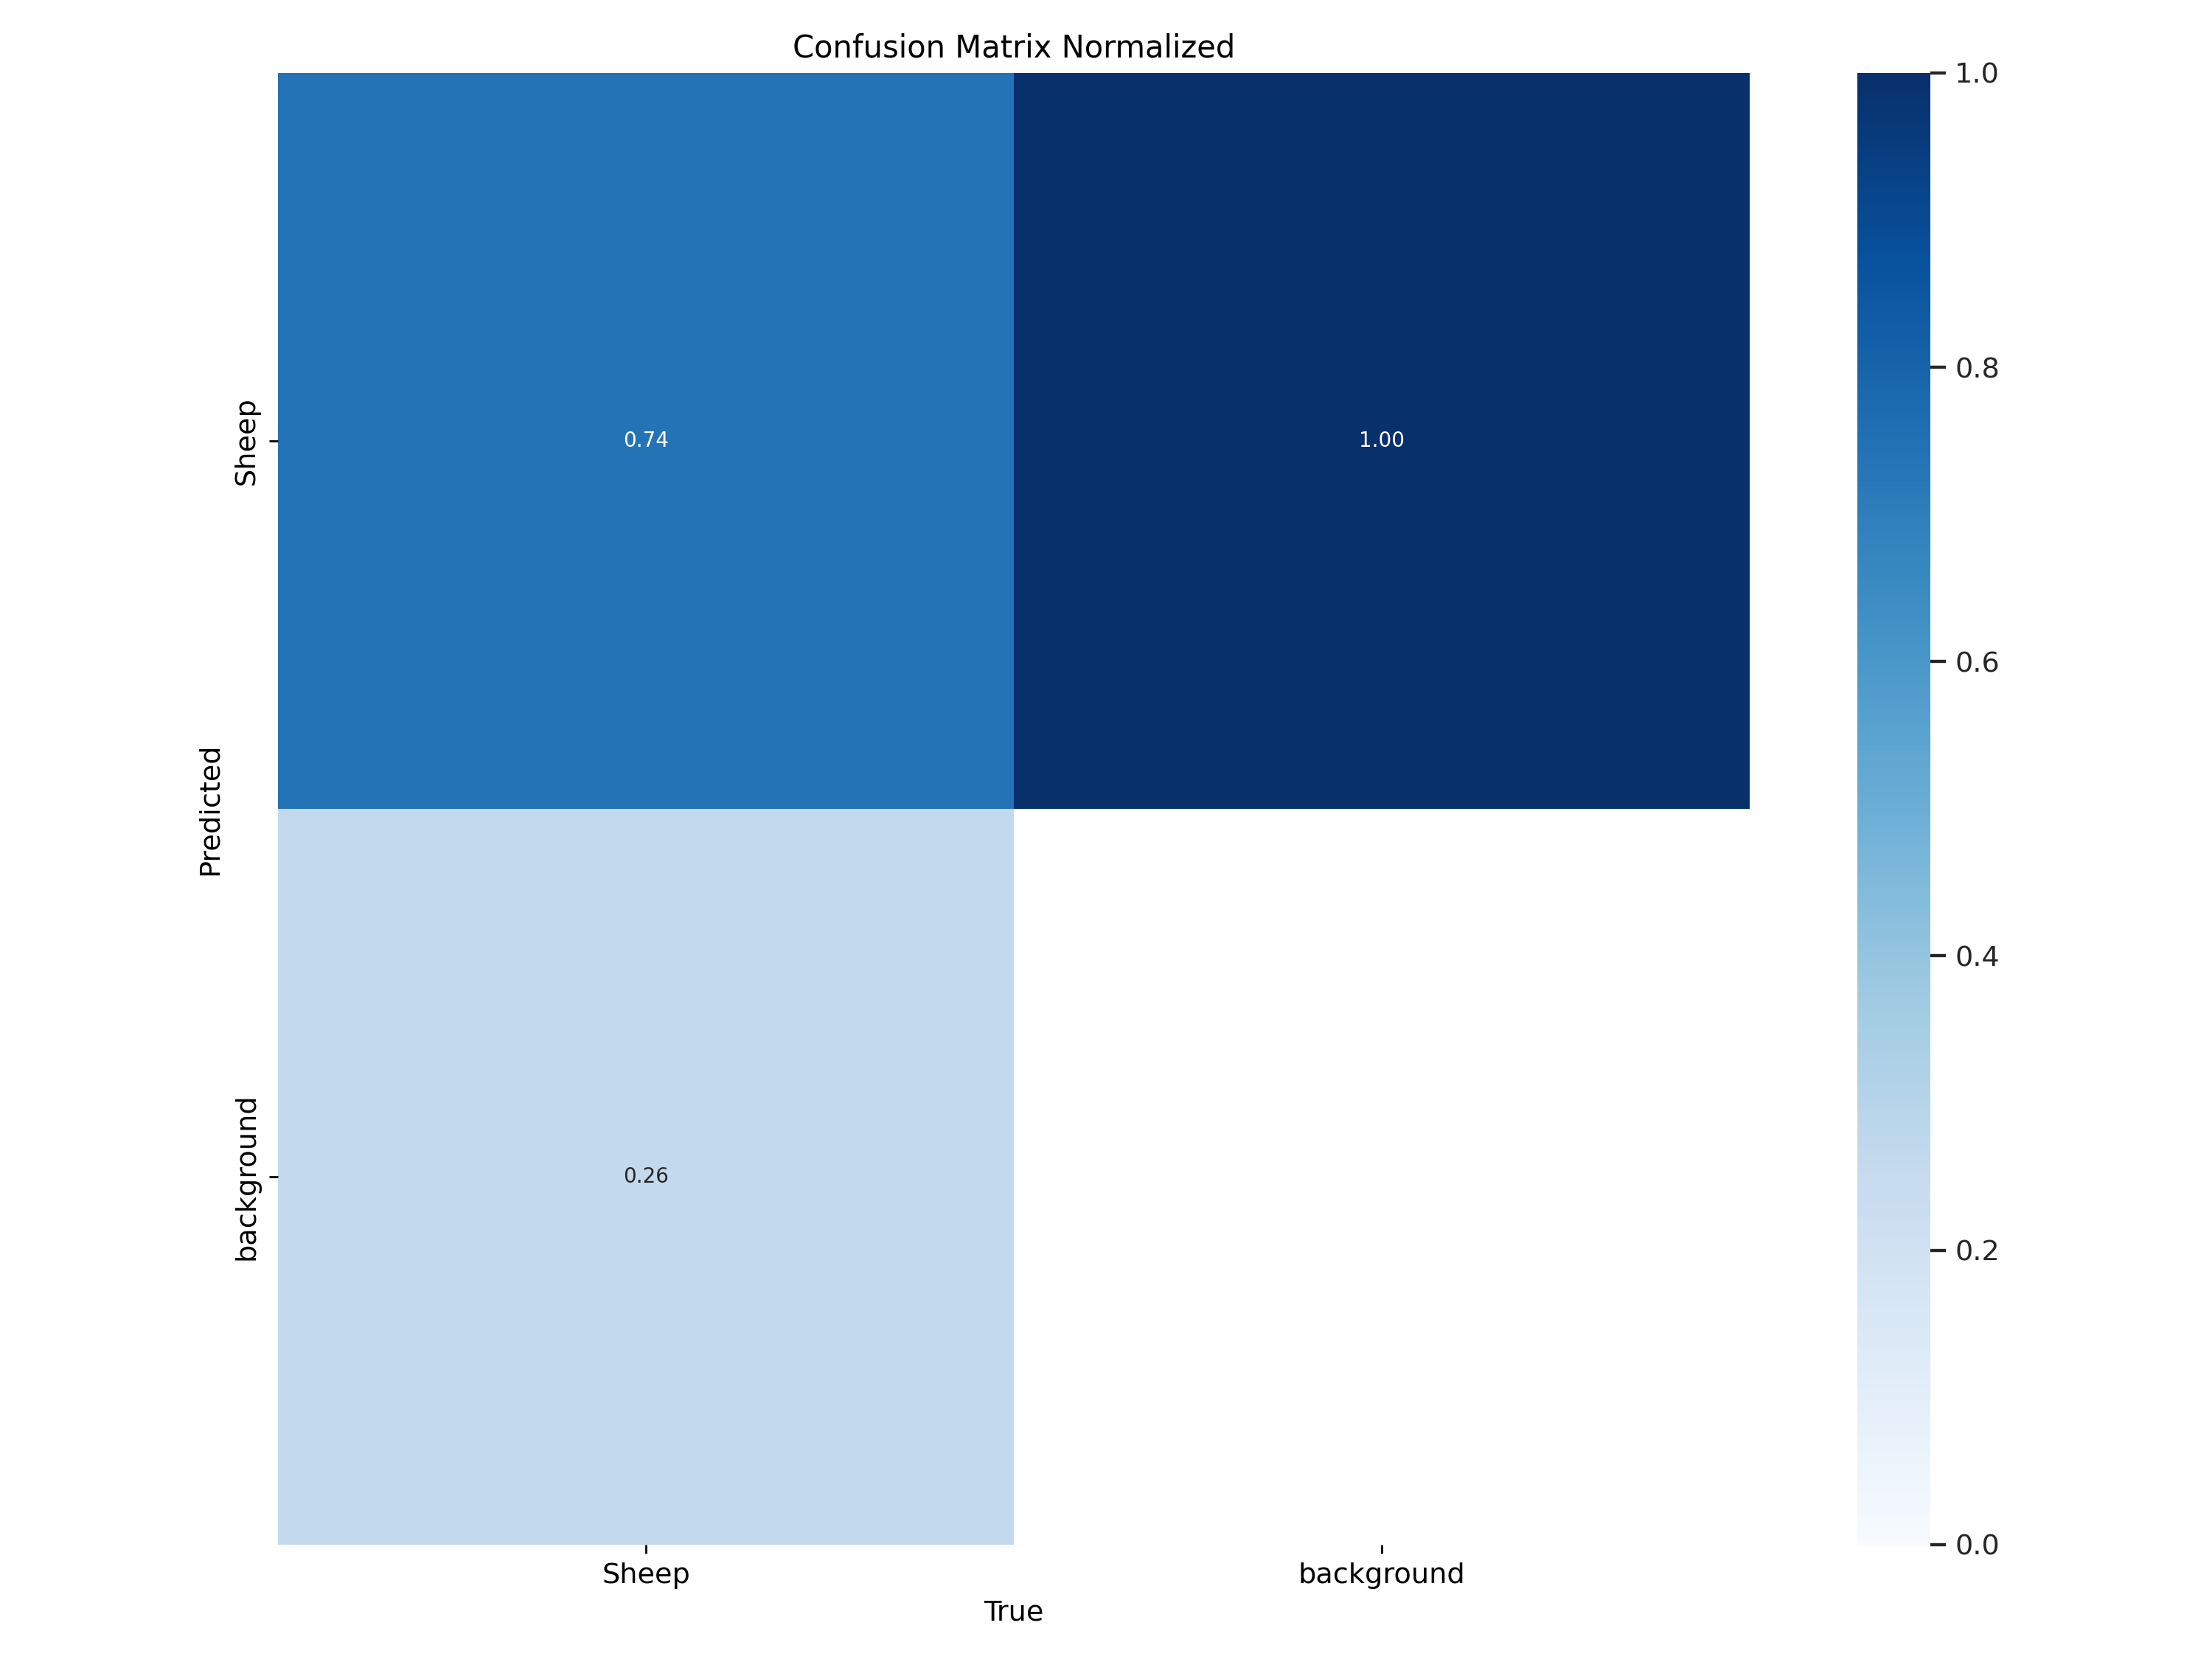

In [22]:
Image("/kaggle/working/runs/detect/custom_yolo11n/confusion_matrix_normalized.png", height=600, width=800)

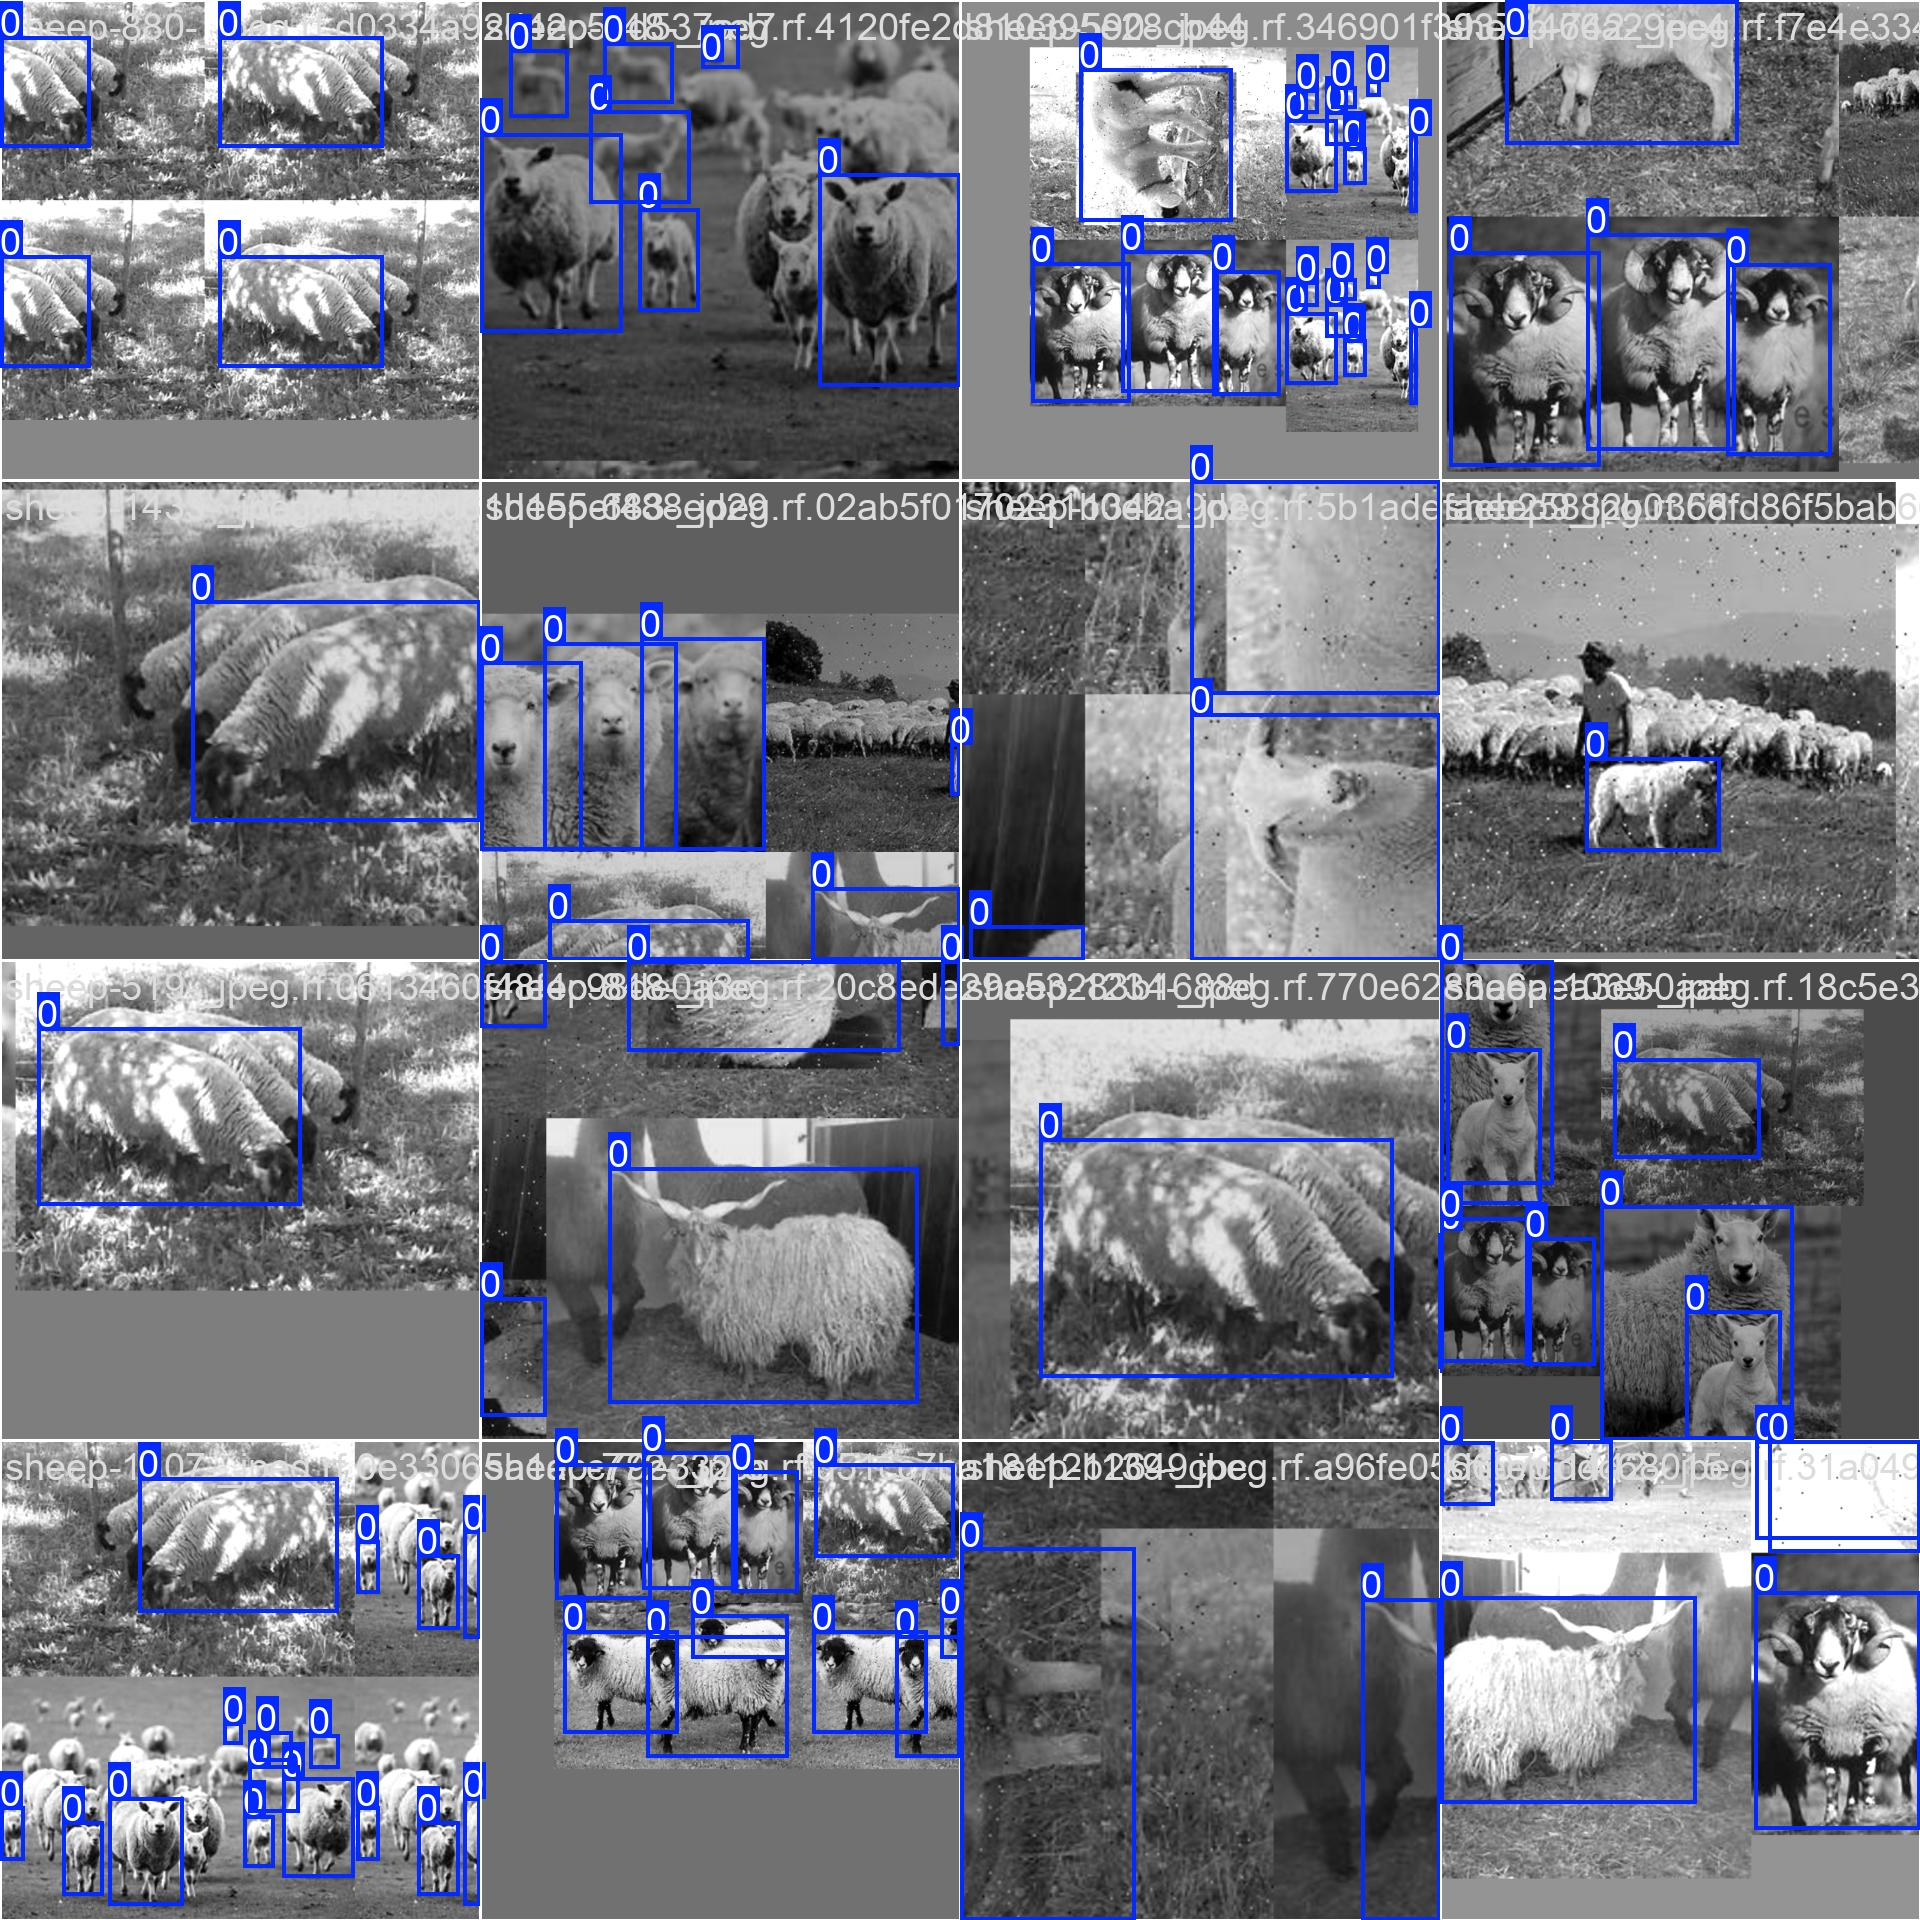

In [18]:
Image("/kaggle/working/runs/detect/custom_yolo11n/train_batch0.jpg", height=700, width=9000)

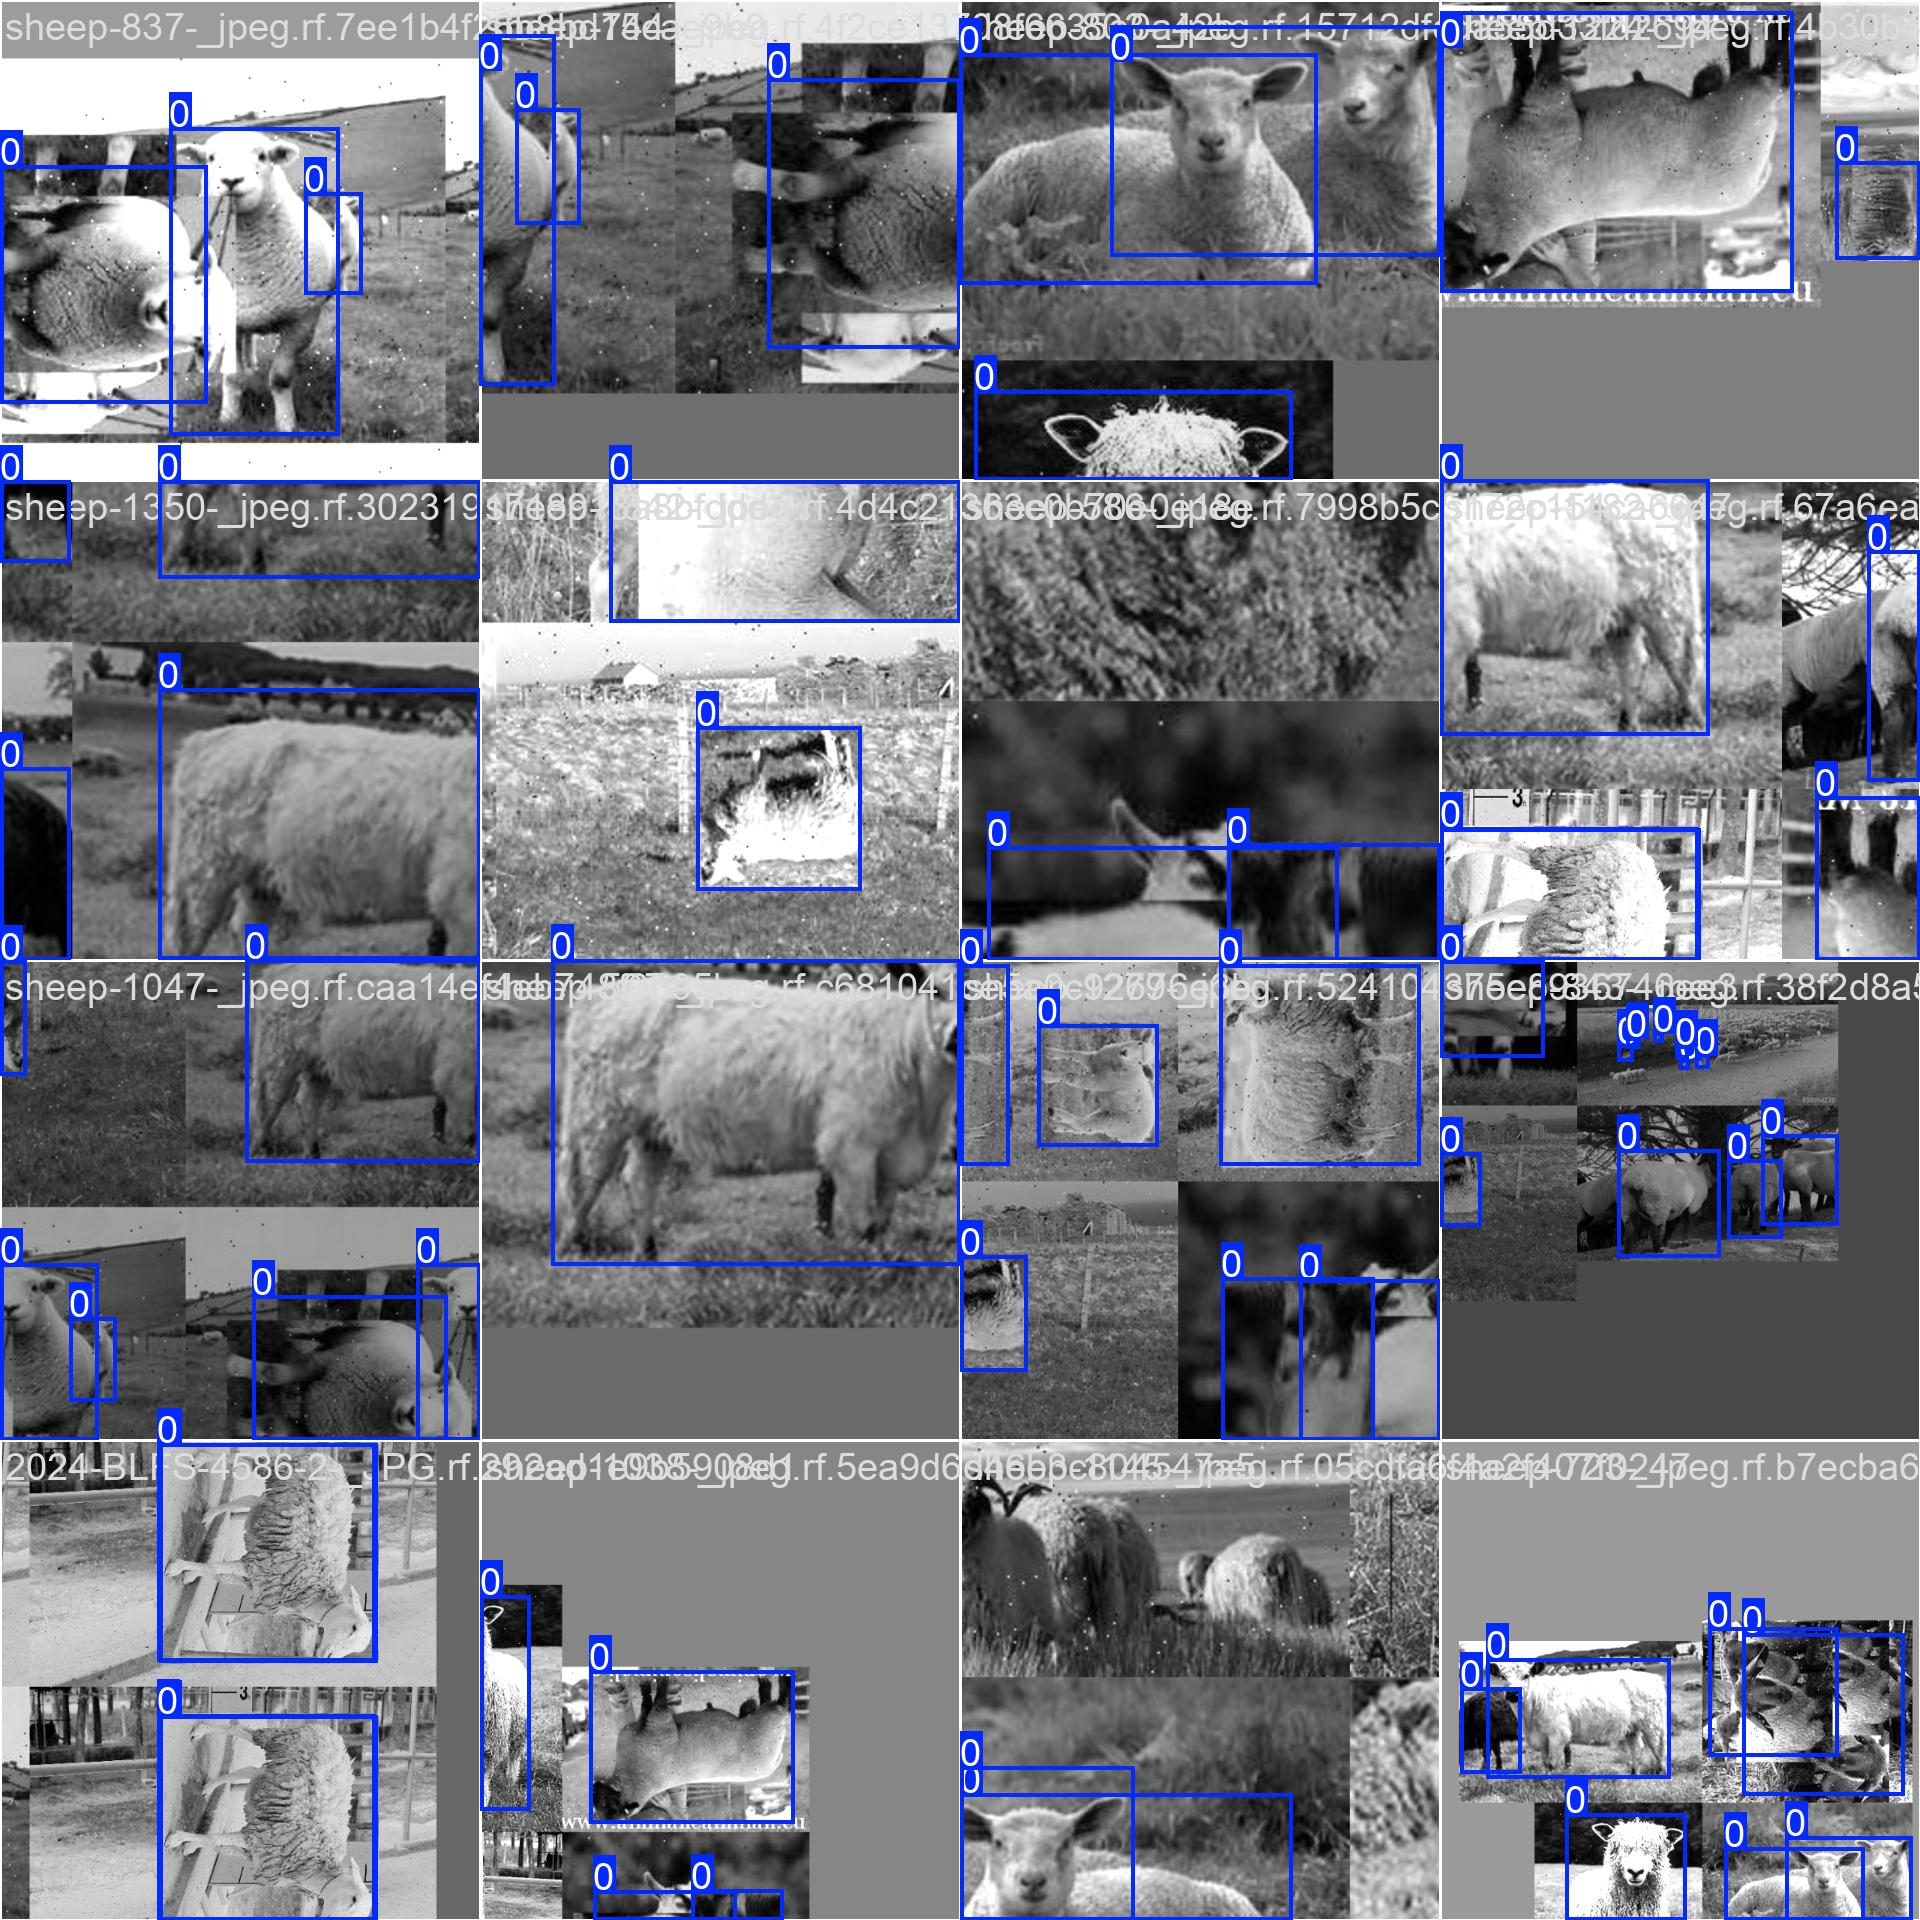

In [24]:
Image("/kaggle/working/runs/detect/custom_yolo11n/train_batch2.jpg", height=600, width=1000)

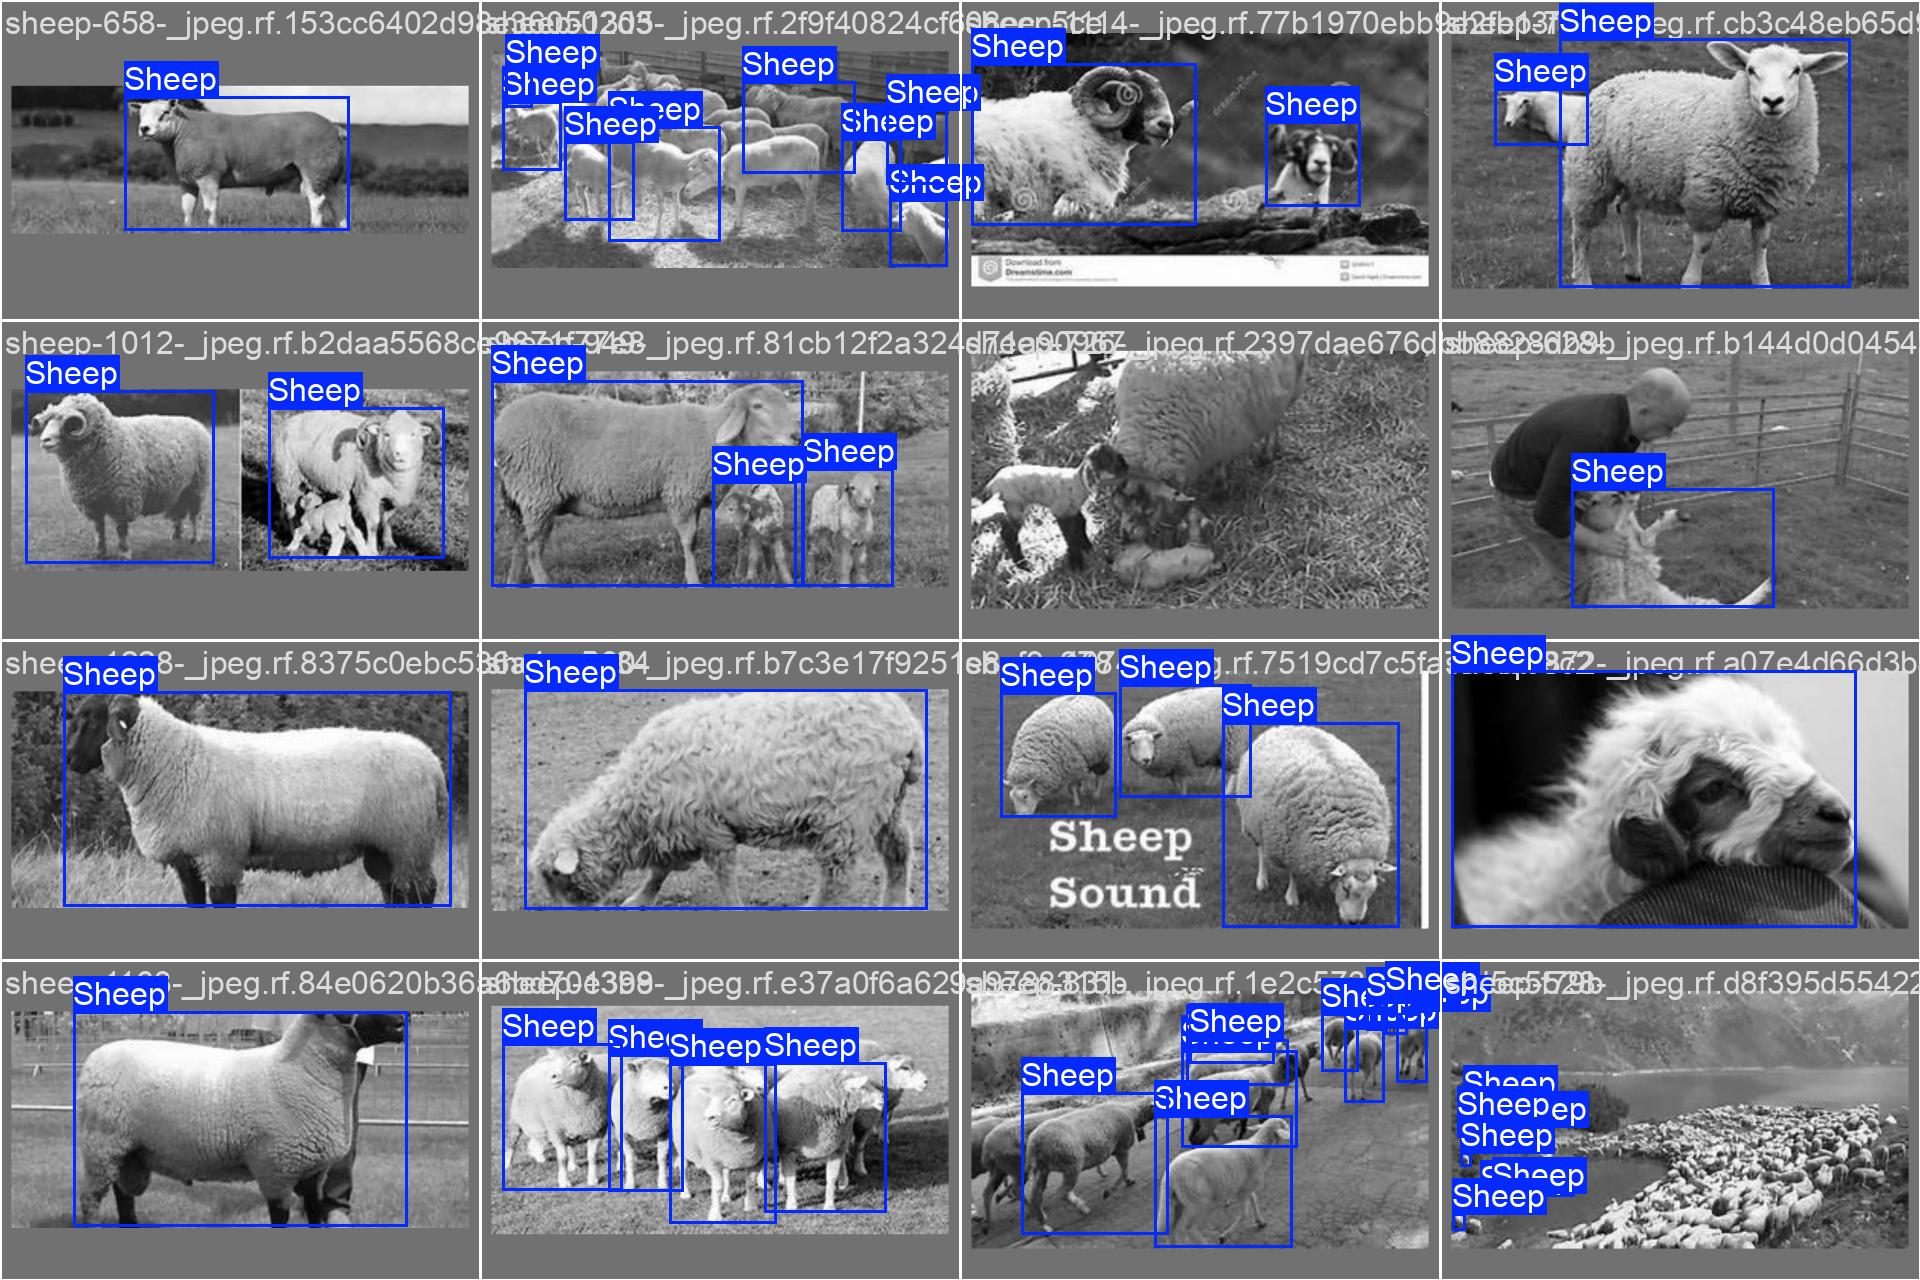

In [25]:
Image("/kaggle/working/runs/detect/custom_yolo11n/val_batch0_labels.jpg", height=700, width=1000)

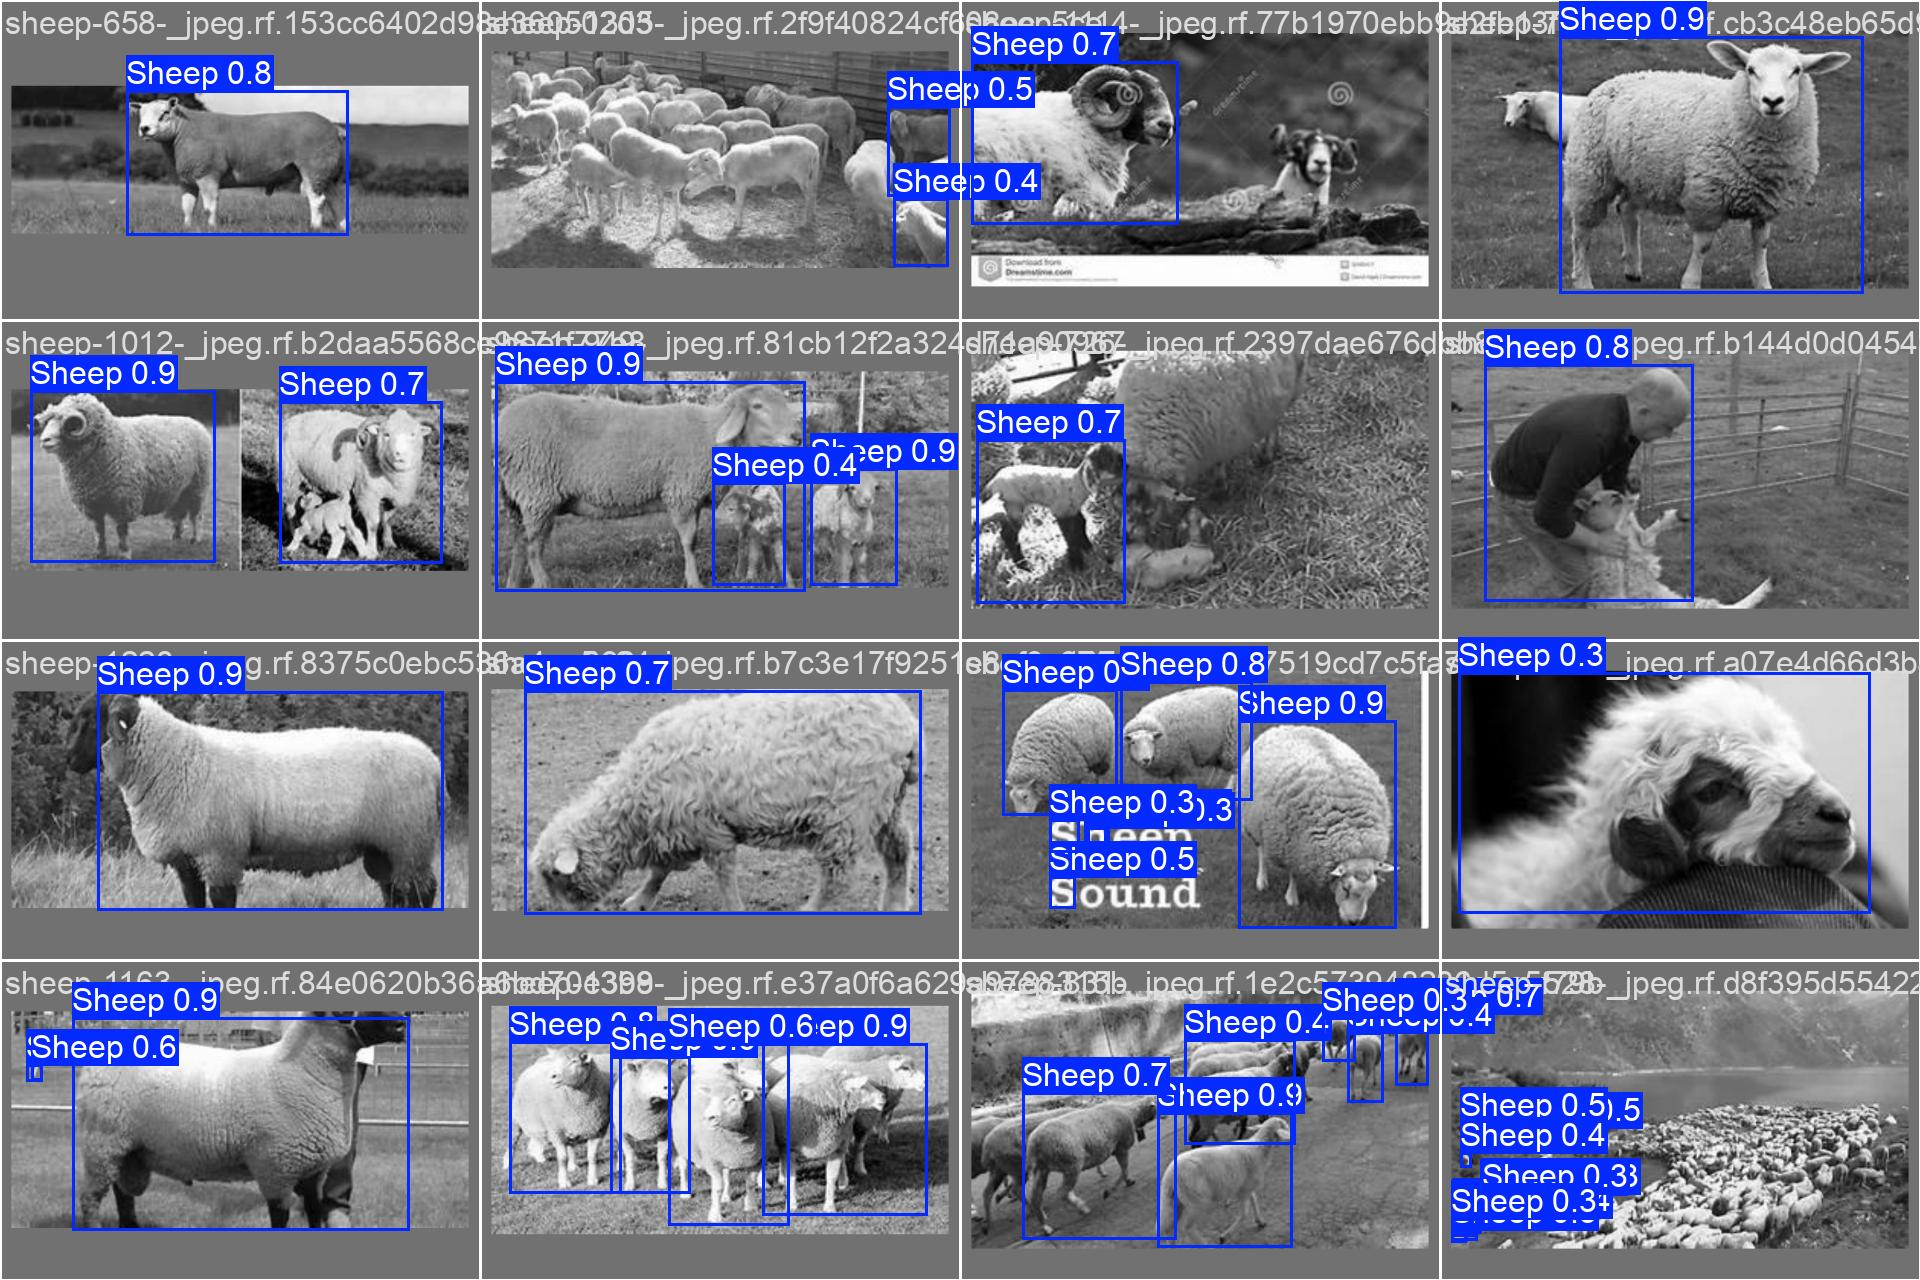

In [26]:
Image("/kaggle/working/runs/detect/custom_yolo11n/val_batch0_pred.jpg", height=700, width=1000)

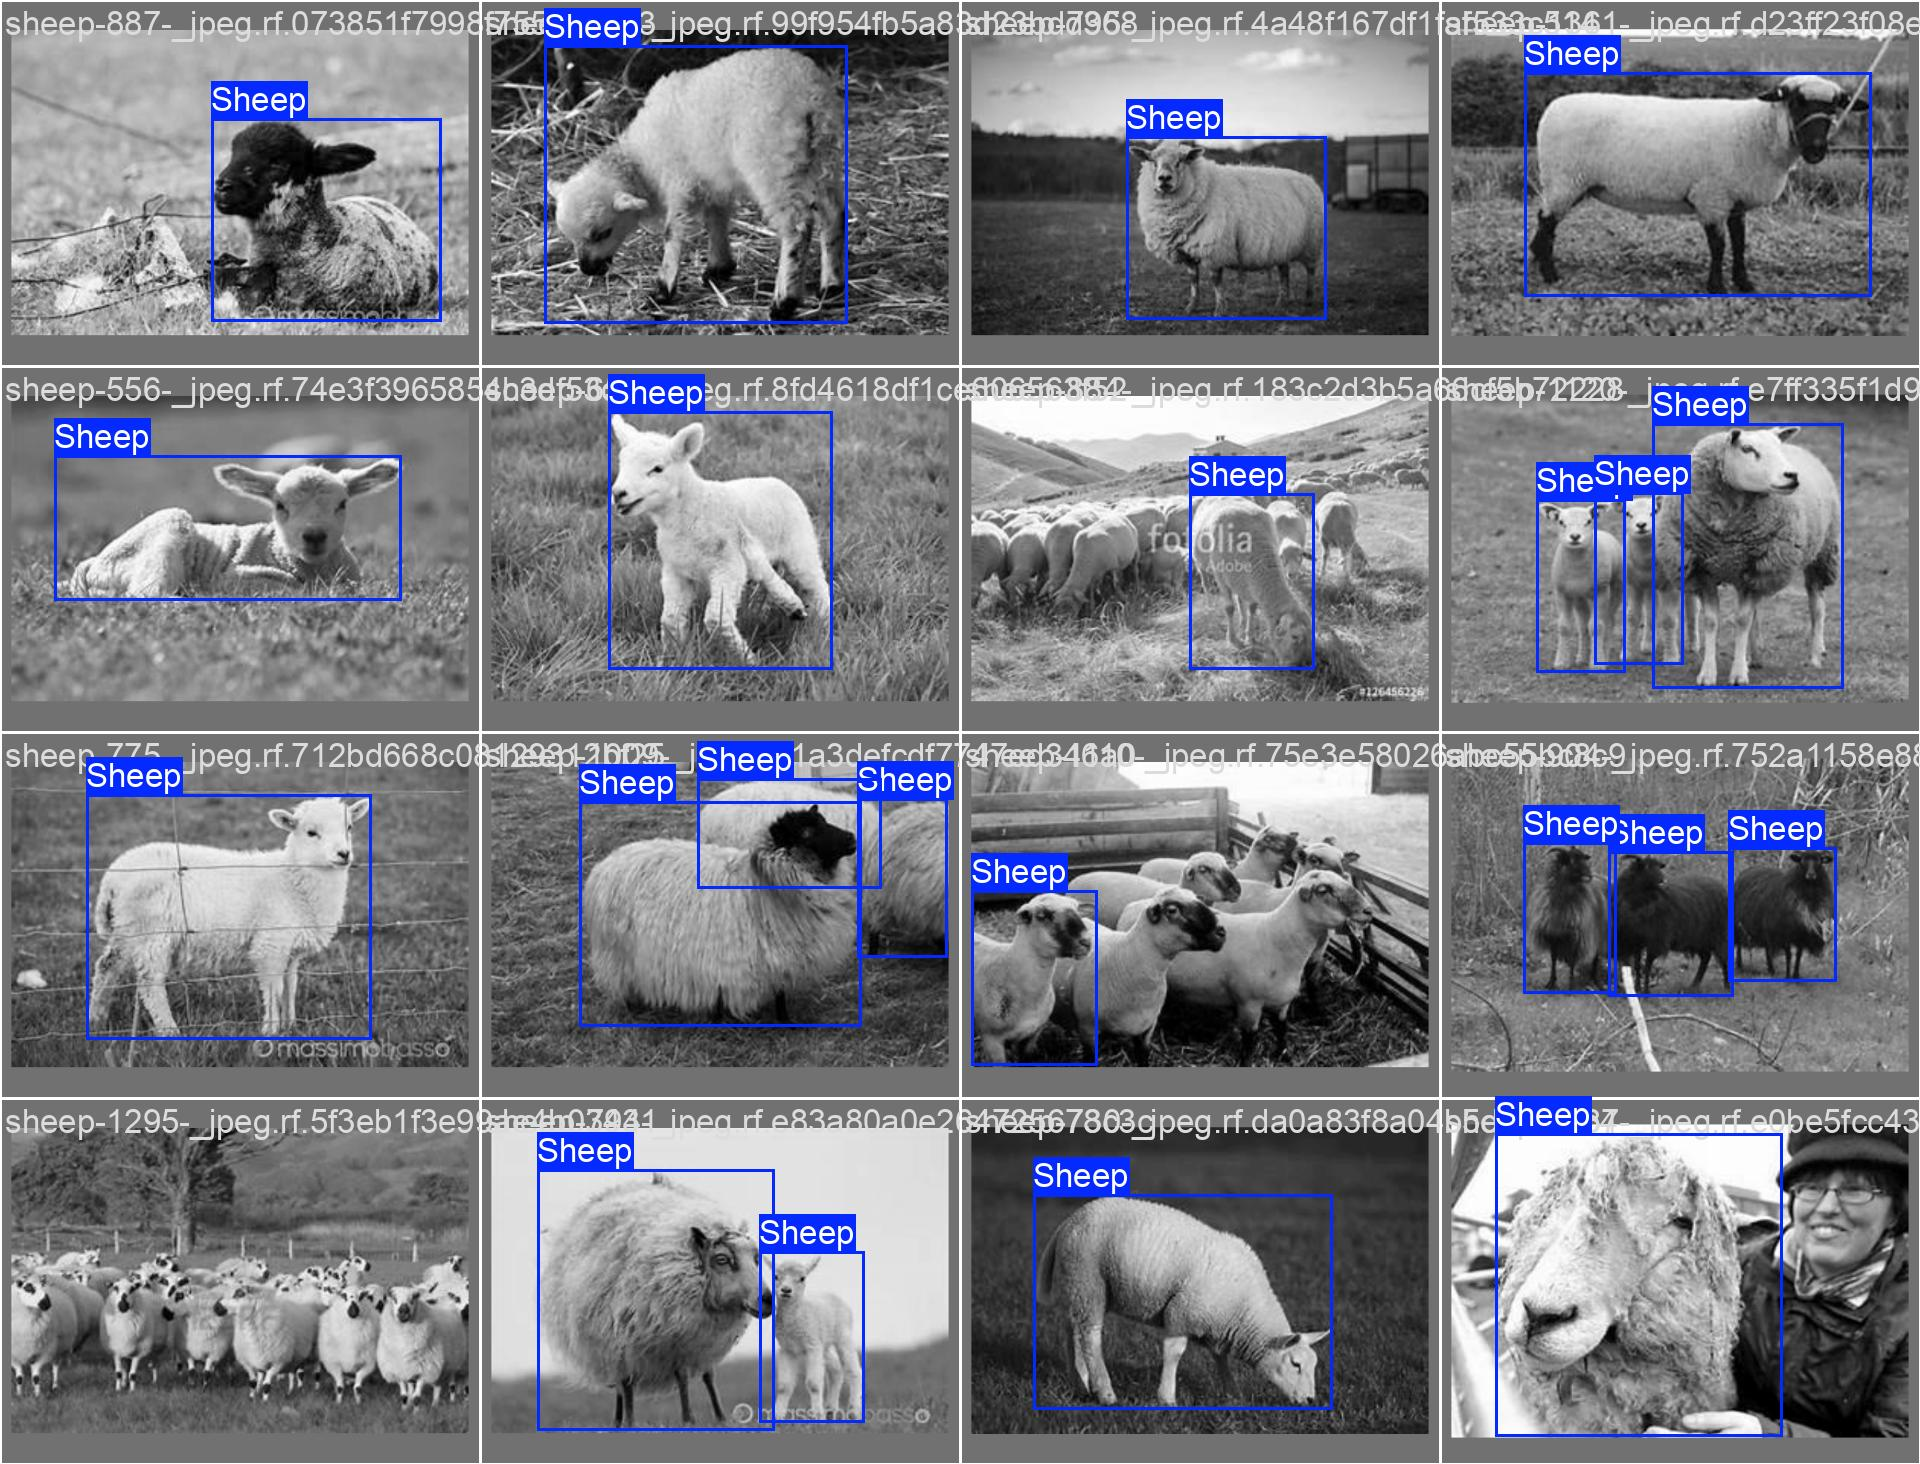

In [27]:
Image("/kaggle/working/runs/detect/custom_yolo11n/val_batch2_labels.jpg", height=700, width=1000)

## Step # 04 Validate Fine-Tuned Model

In [28]:
!yolo task=detect mode=val model="/kaggle/working/runs/detect/custom_yolo11n/weights/best.pt" data={dataset.location}/data.yaml

Ultralytics 8.3.59 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /kaggle/working/Sheep-1/valid/labels.cache... 167 images, 13 backg
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all        167        321      0.795      0.679      0.786      0.568
Speed: 1.4ms preprocess, 5.7ms inference, 0.0ms loss, 2.3ms postprocess per image
Results saved to runs/detect/val
💡 Learn more at https://docs.ultralytics.com/modes/val


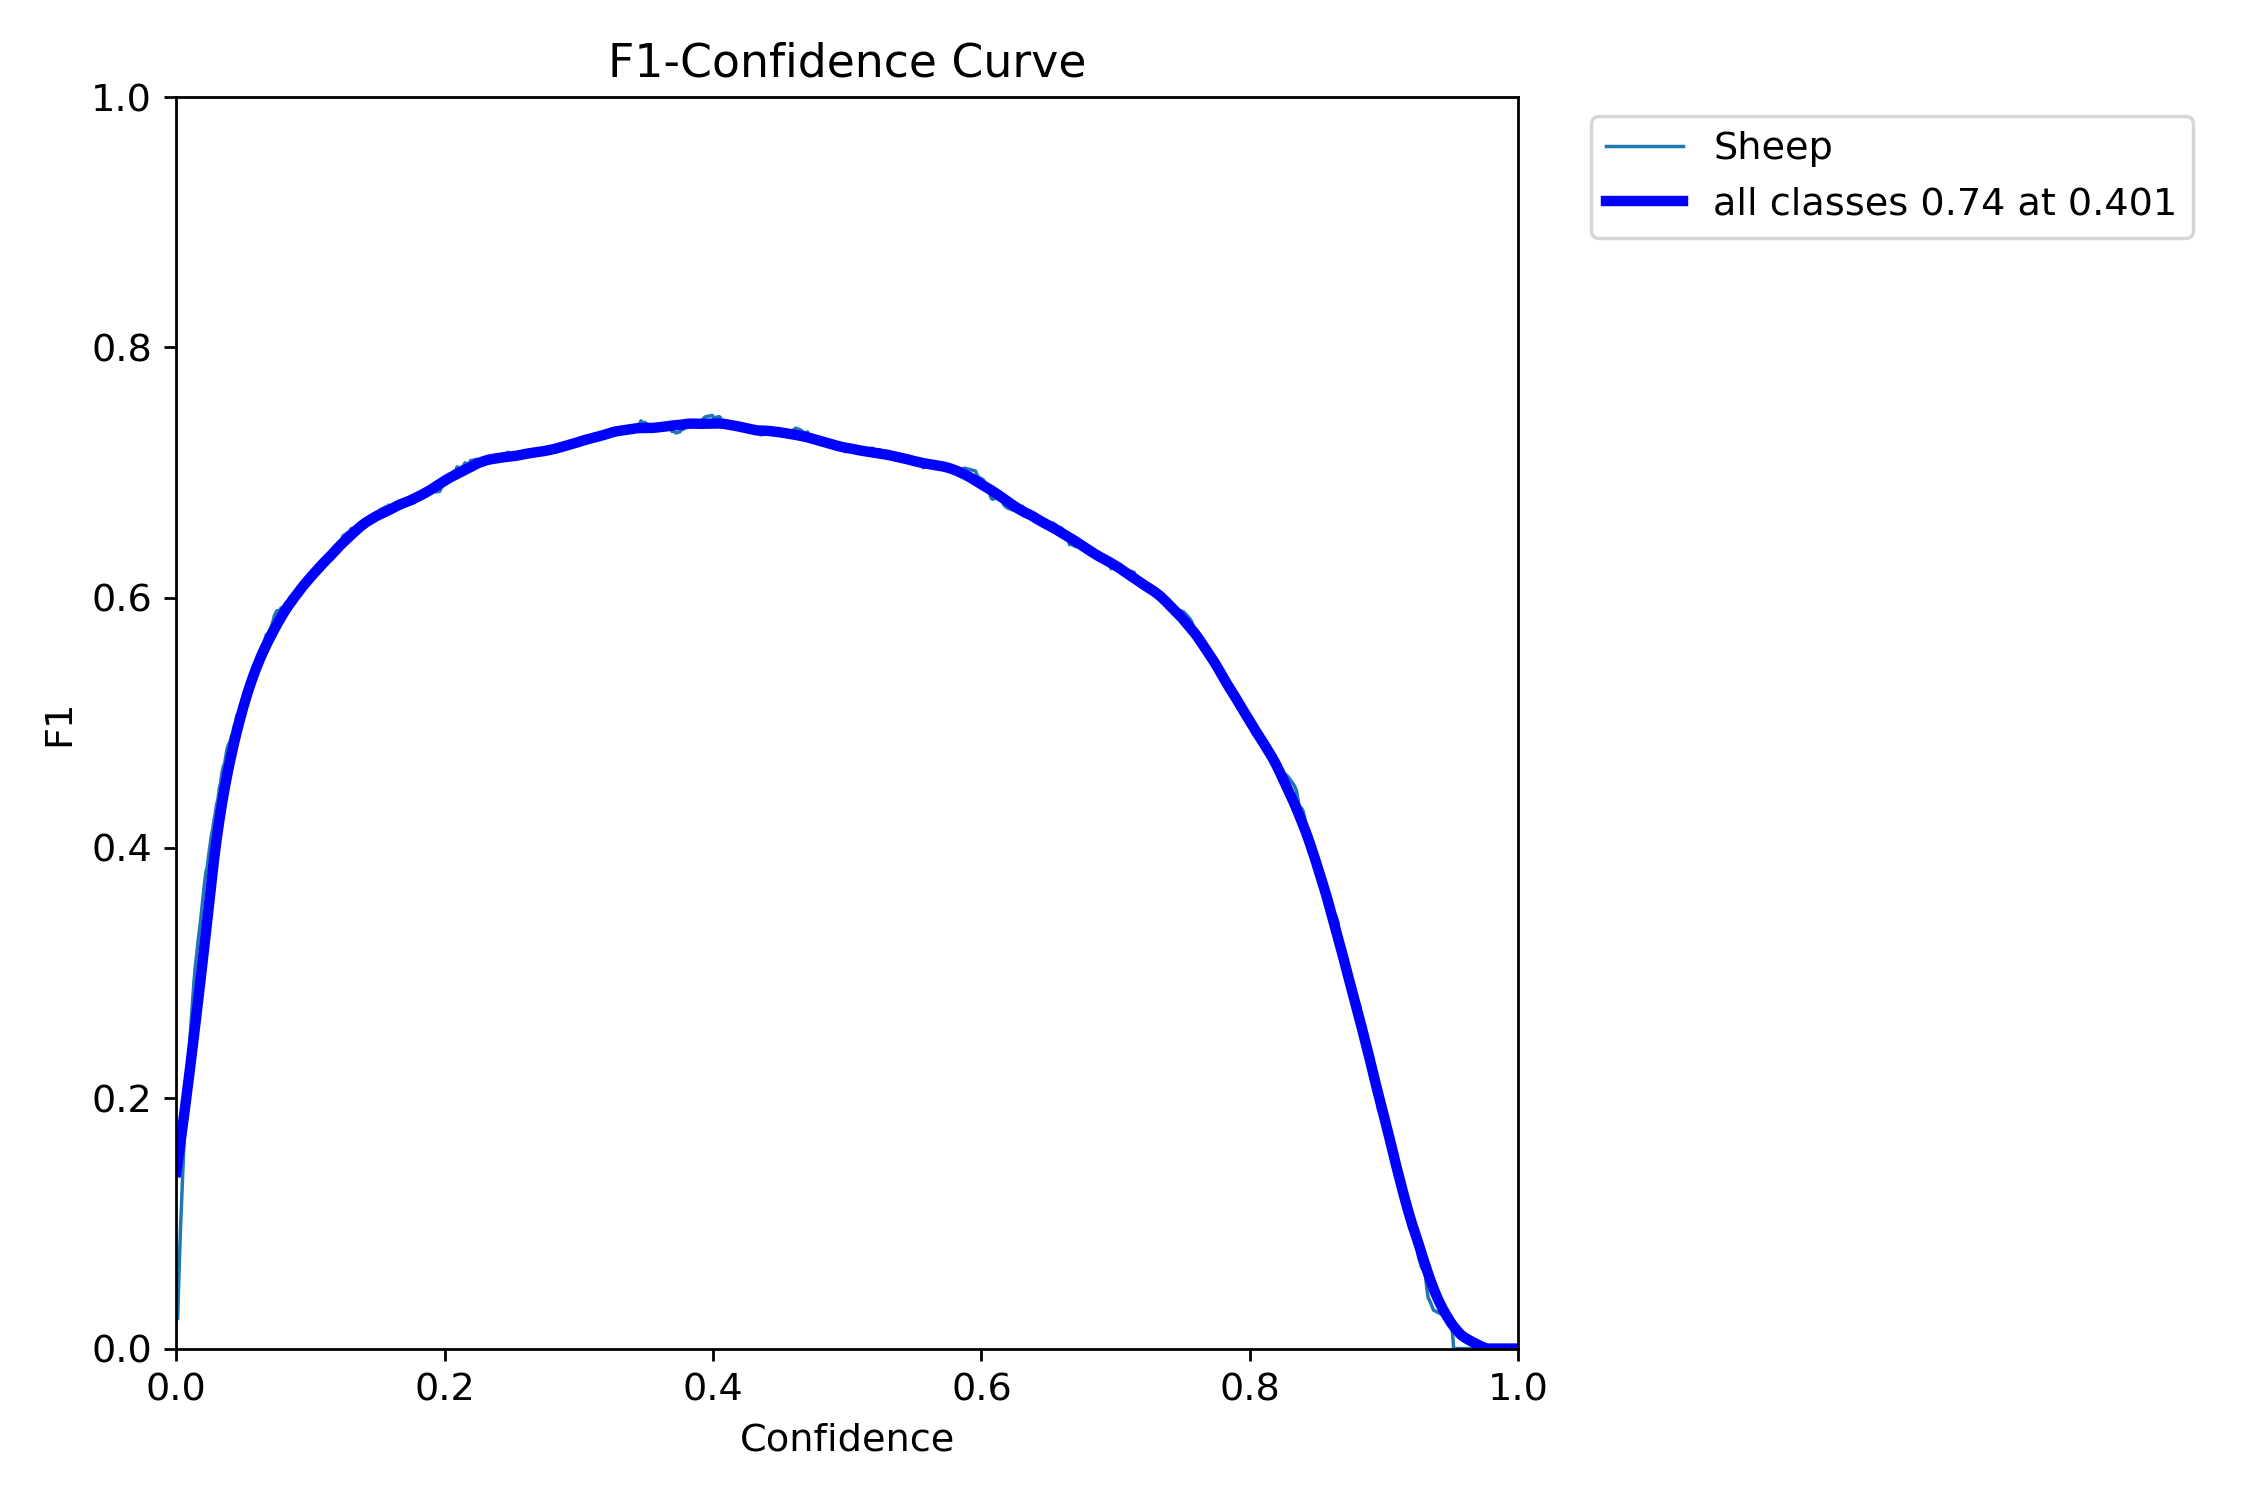

In [30]:
Image("/kaggle/working/runs/detect/val/F1_curve.png", width=1000)

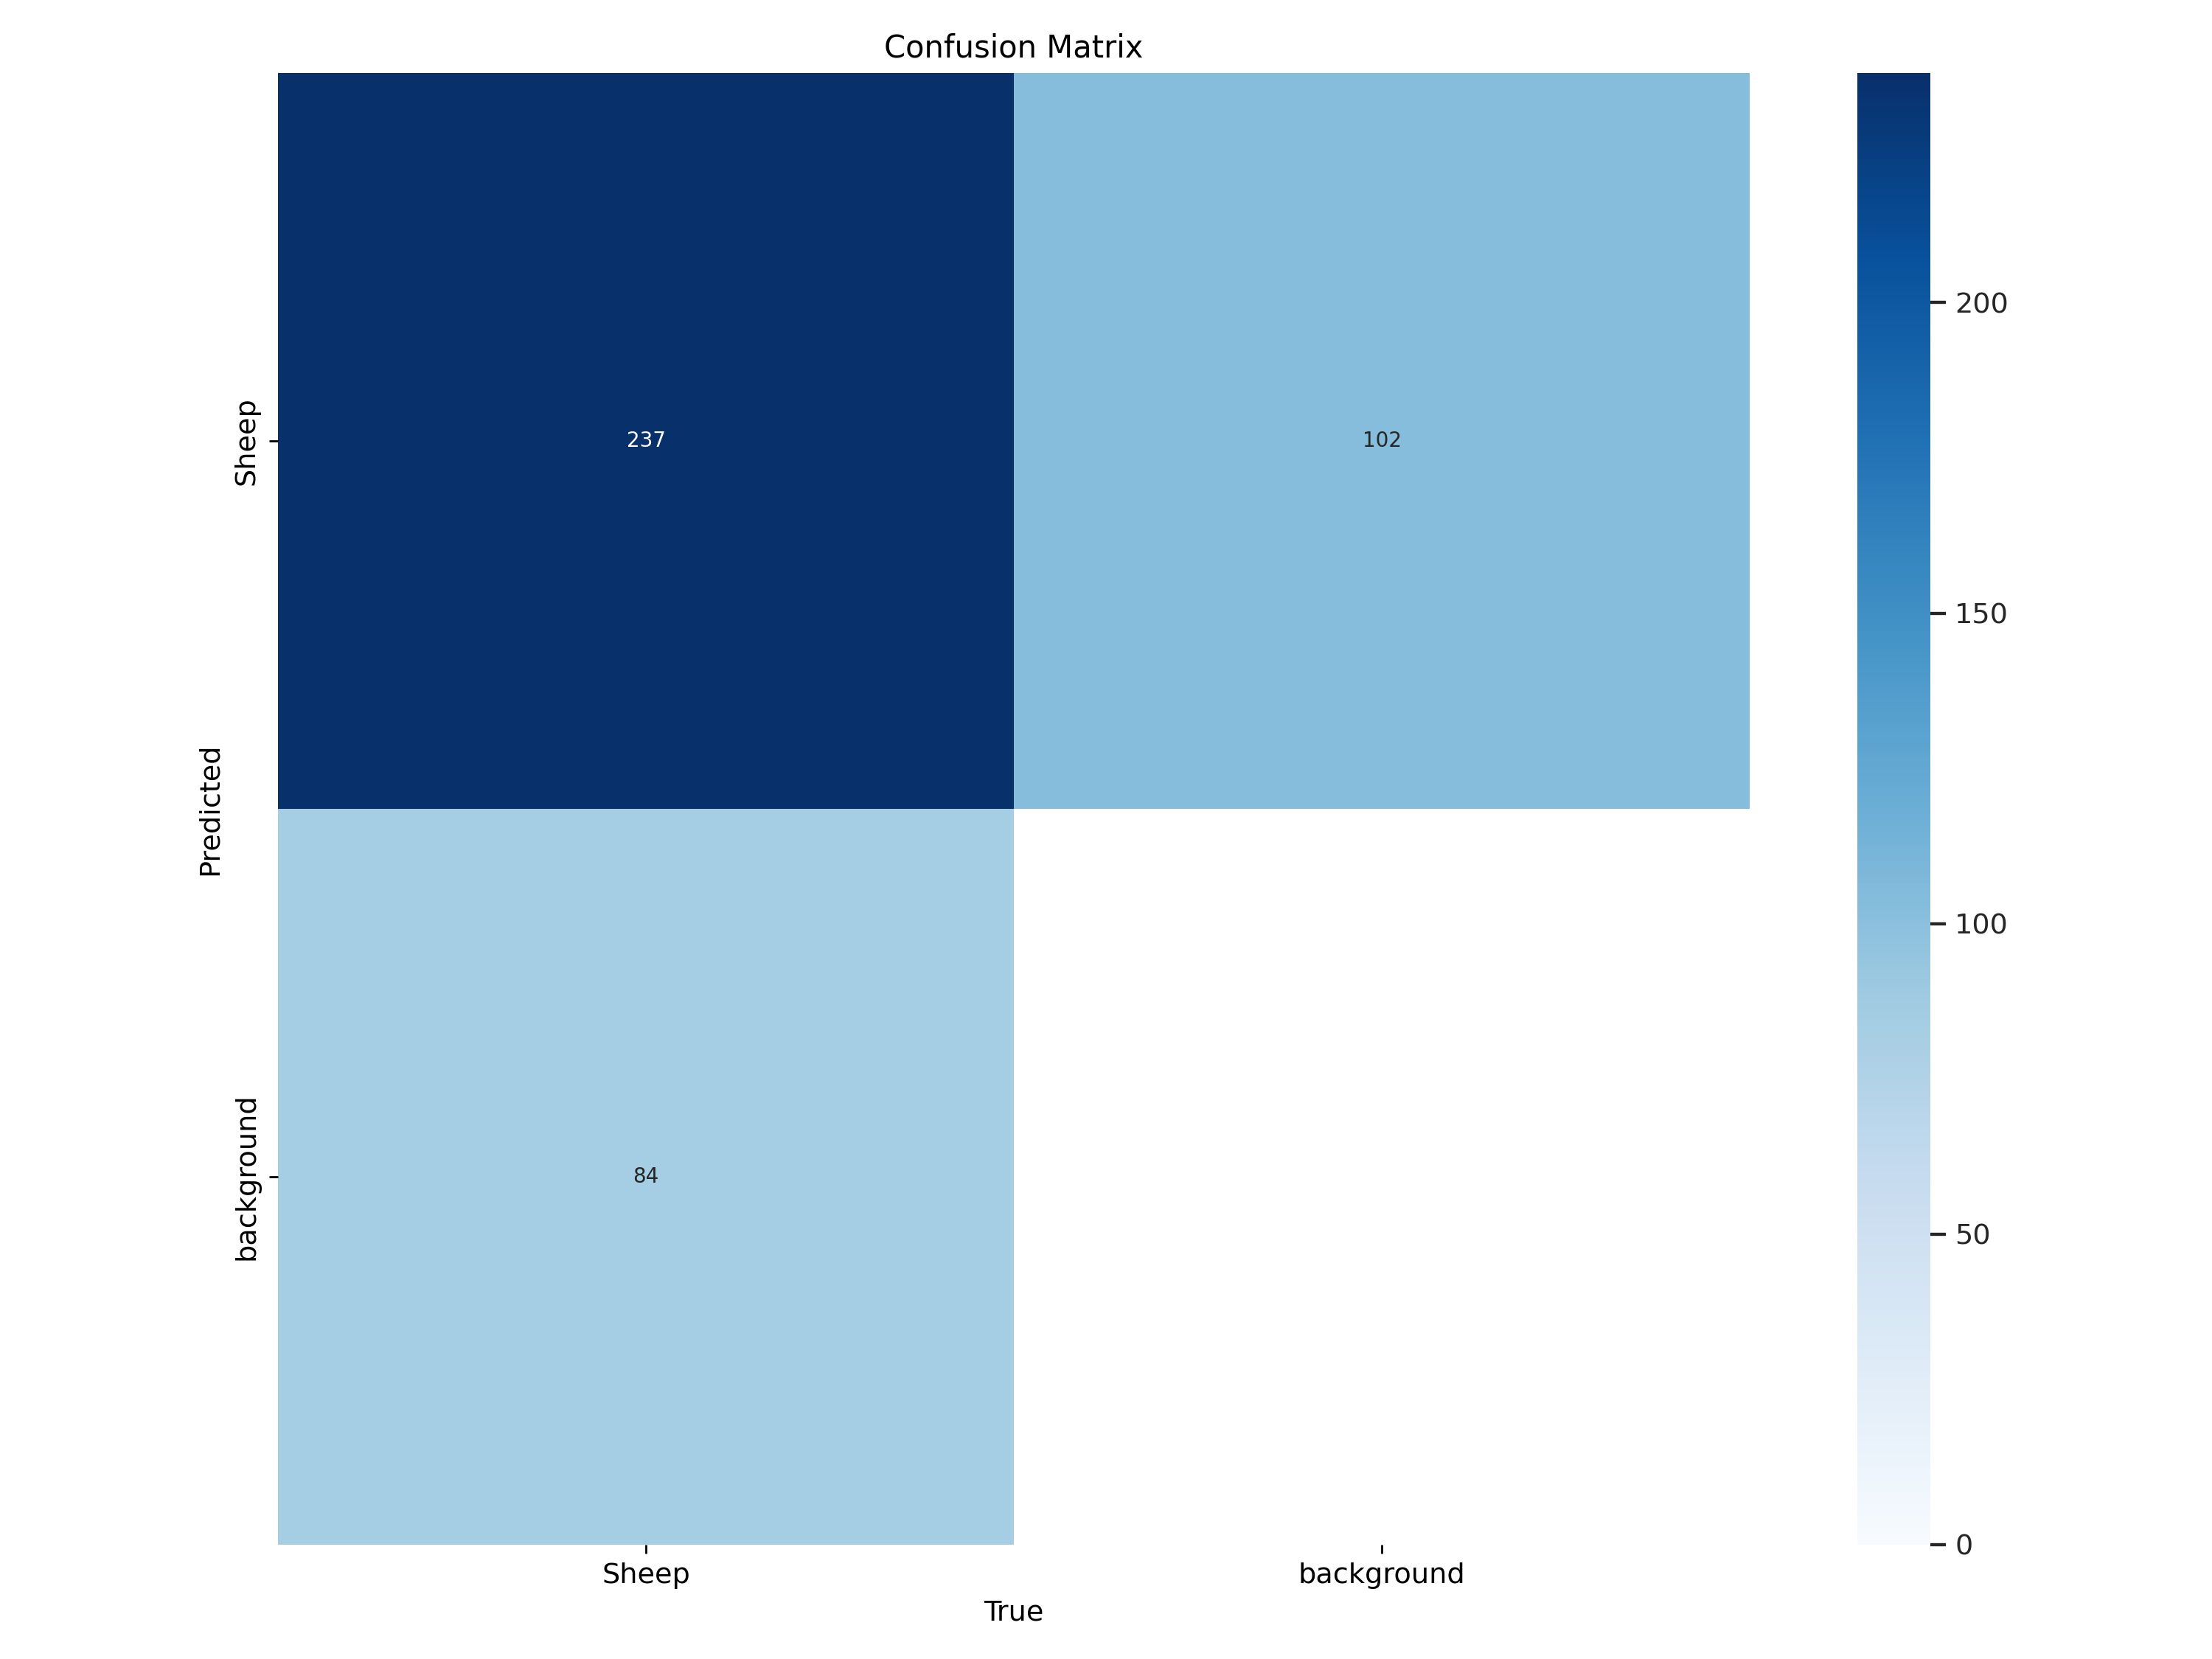

In [32]:
Image("/kaggle/working/runs/detect/val/confusion_matrix.png", height=600, width=1000)

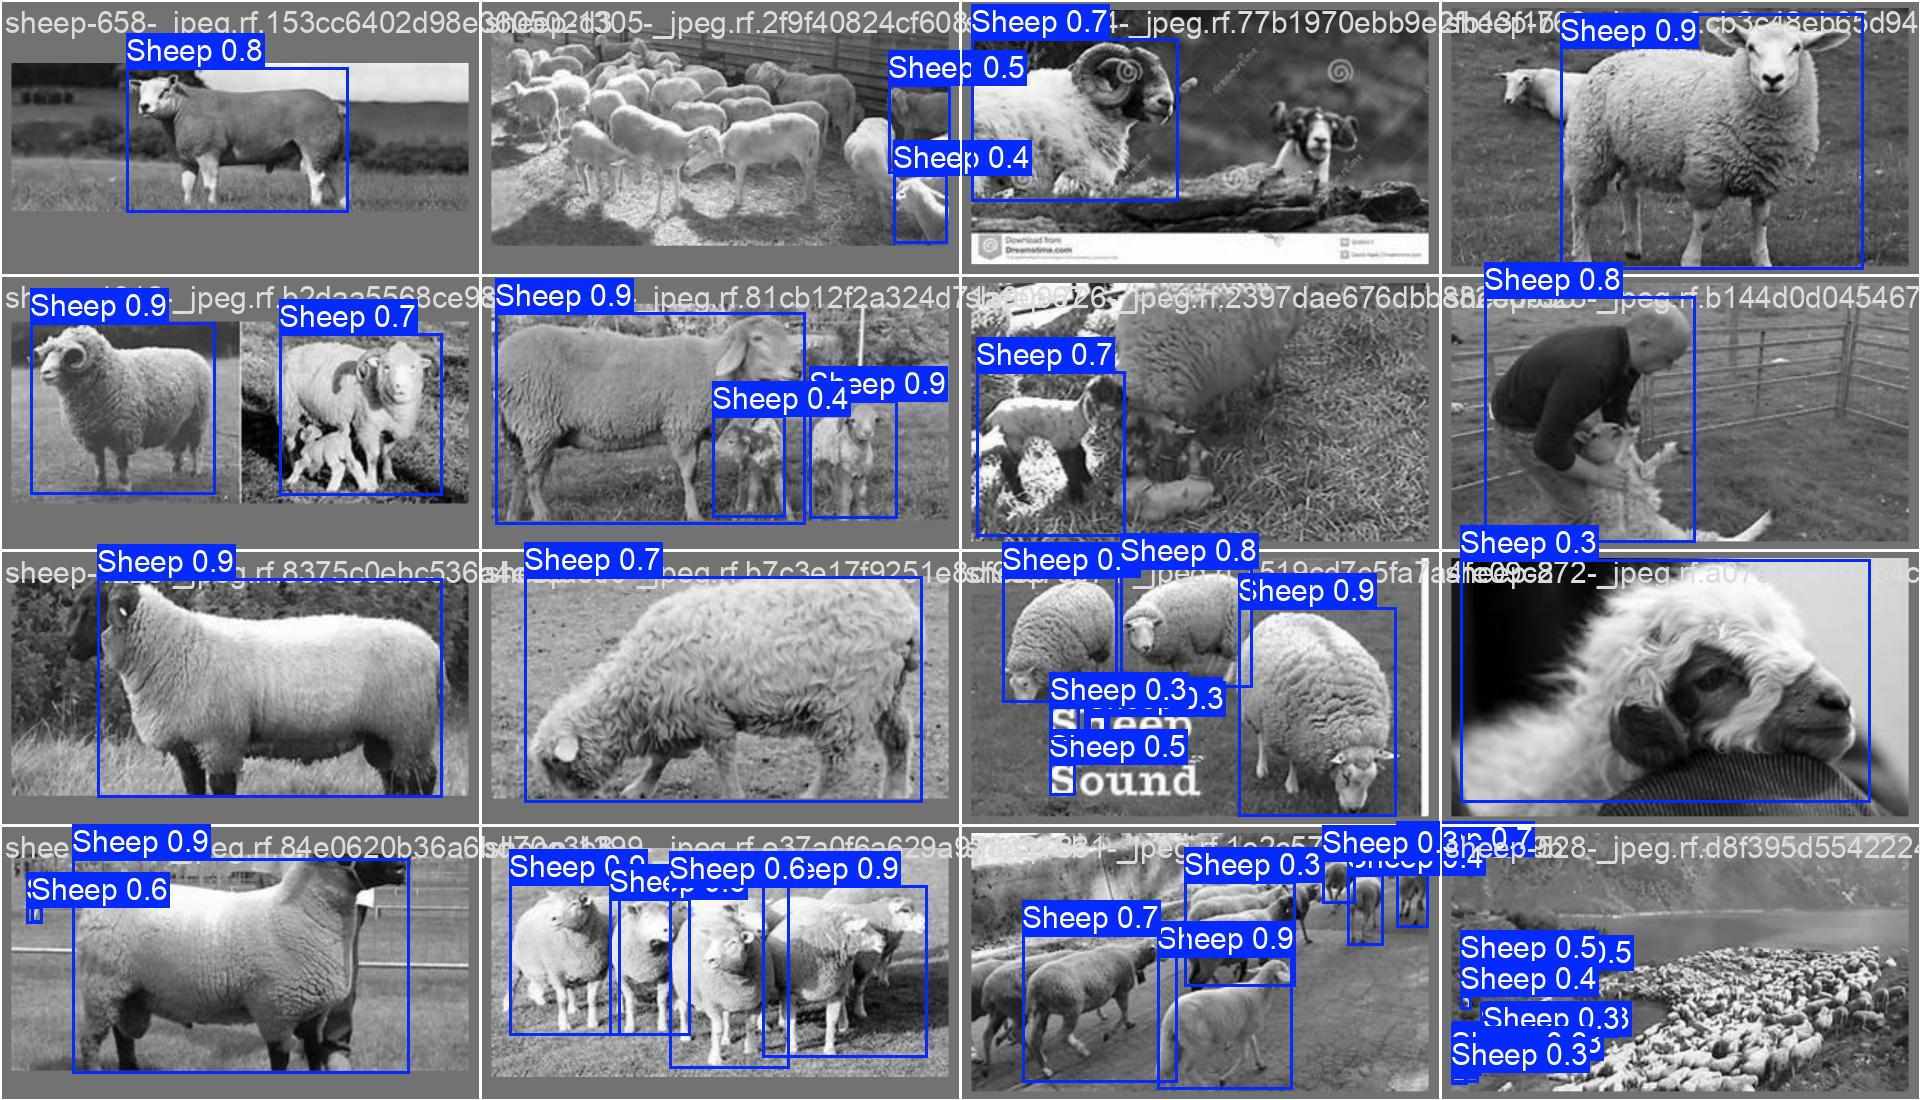

In [33]:
Image("/kaggle/working/runs/detect/val/val_batch0_pred.jpg", height=600, width=1000)

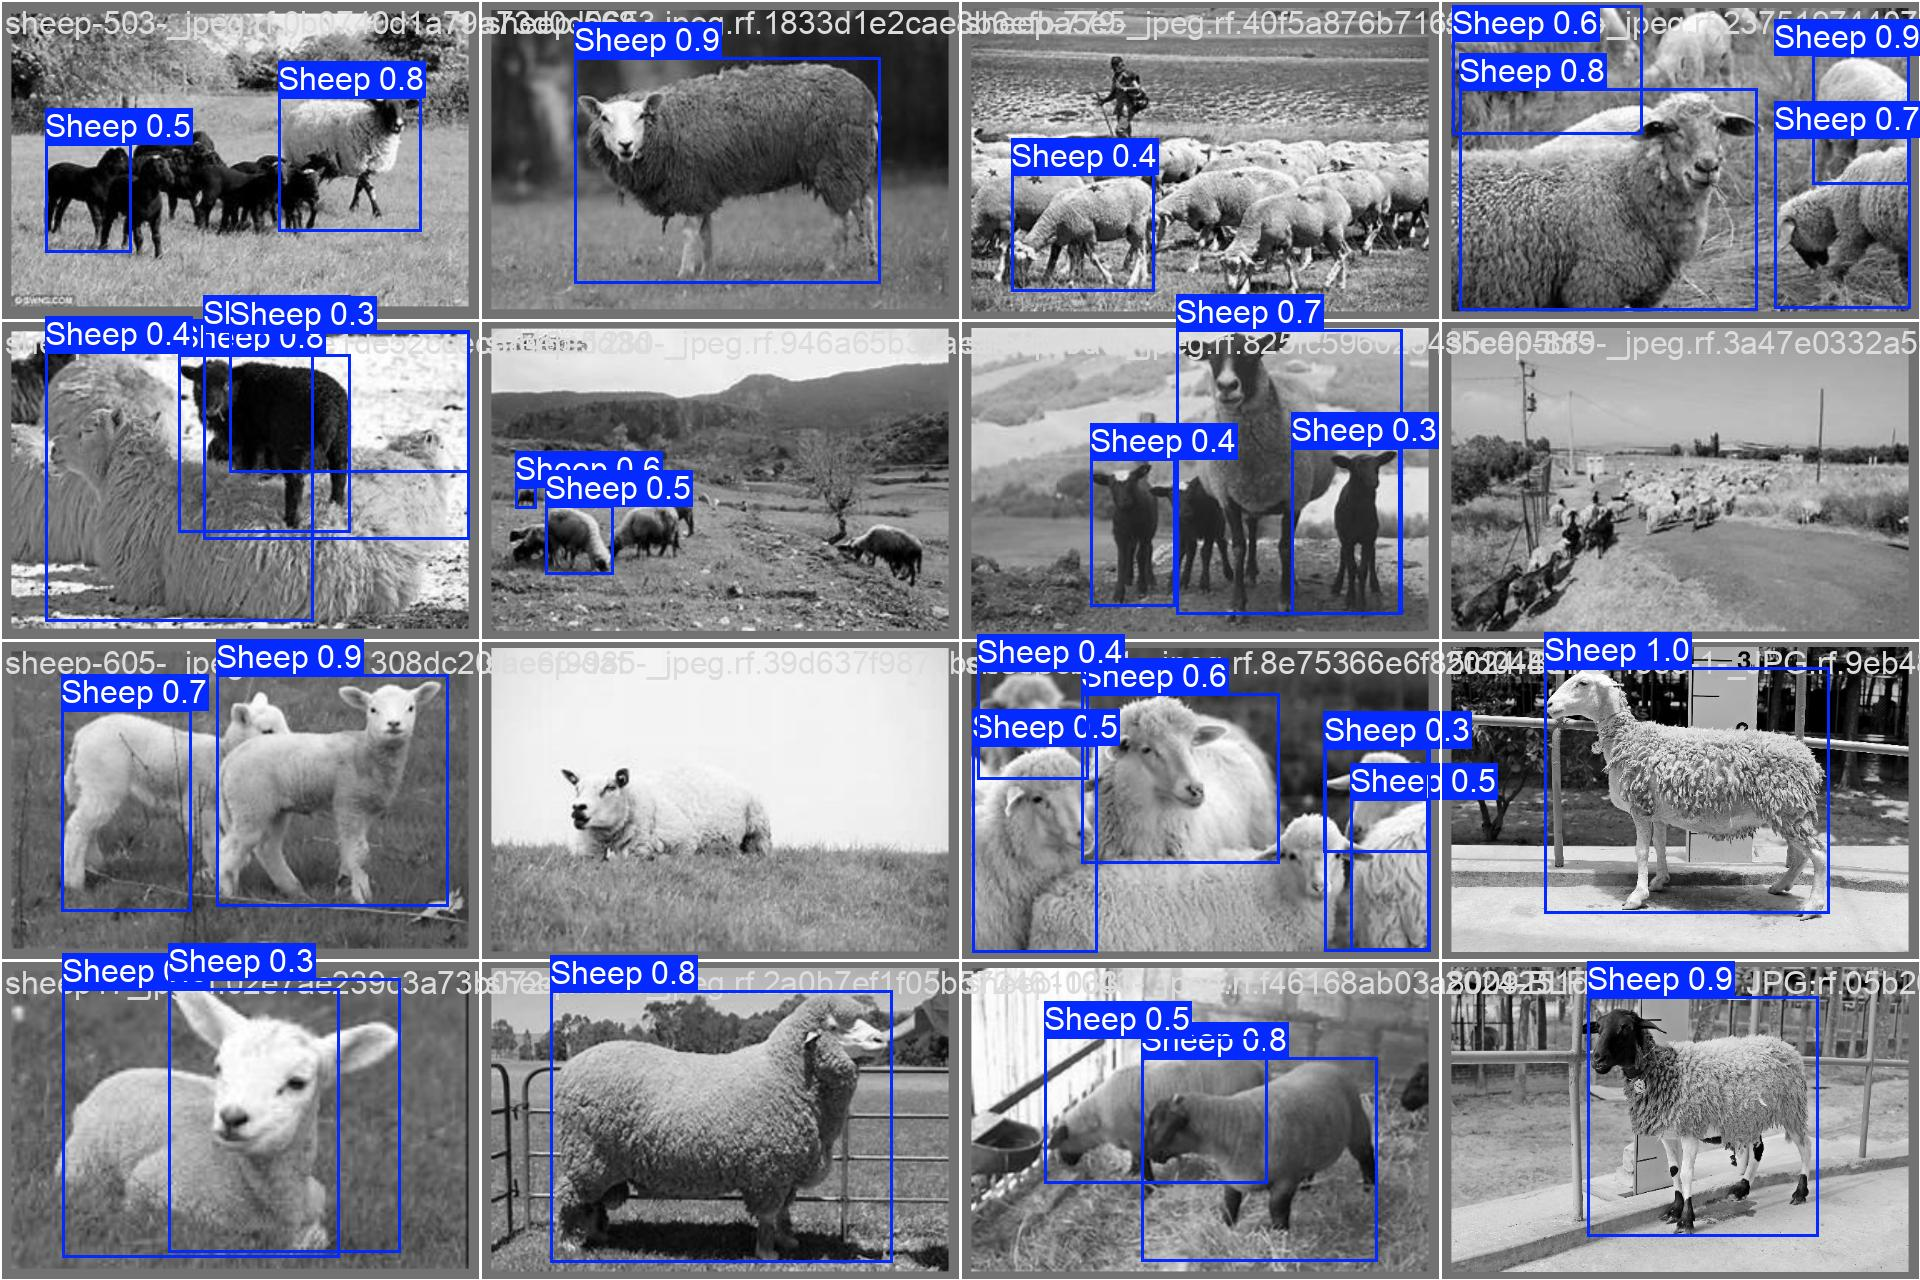

In [34]:
Image("/kaggle/working/runs/detect/val/val_batch2_pred.jpg", height=600, width=1000)

## Step # 05 Inference with Custom Model on Images

In [35]:
!yolo task=detect mode=predict model="/kaggle/working/runs/detect/custom_yolo11n/weights/best.pt" conf=0.25 source="{dataset.location}/test/images" save=True


Ultralytics 8.3.59 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla P100-PCIE-16GB, 16269MiB)
Model summary (fused): 168 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs

image 1/82 /kaggle/working/Sheep-1/test/images/2024-BLFS-4581-1-_JPG.rf.d33bd5ee5fbd1e7400a748db8099b586.jpg: 448x640 2 Sheeps, 31.4ms
image 2/82 /kaggle/working/Sheep-1/test/images/2024-BLFS-4584-3-_JPG.rf.c4644f413b322d0b0cd9b0e32f0ec45a.jpg: 448x640 2 Sheeps, 6.4ms
image 3/82 /kaggle/working/Sheep-1/test/images/2024-BLFS-4585-1-_JPG.rf.5f959b778bdfdccd96b7f83936a4178b.jpg: 448x640 1 Sheep, 6.4ms
image 4/82 /kaggle/working/Sheep-1/test/images/2024-BLFS-4585-2-_JPG.rf.31f33bc964b1ccacb5c6656882b7cdae.jpg: 448x640 2 Sheeps, 5.7ms
image 5/82 /kaggle/working/Sheep-1/test/images/2024-BLFS-4590-3-_JPG.rf.986f6f3d0983cd9ae0836e16a5a5b30c.jpg: 448x640 1 Sheep, 5.7ms
image 6/82 /kaggle/working/Sheep-1/test/images/sheep-1016-_jpeg.rf.c43bcac64cb7395c84f78f7e334a6d4b.jpg: 416x640 1 Sheep, 31.8ms
image 7/82 /kaggle/working

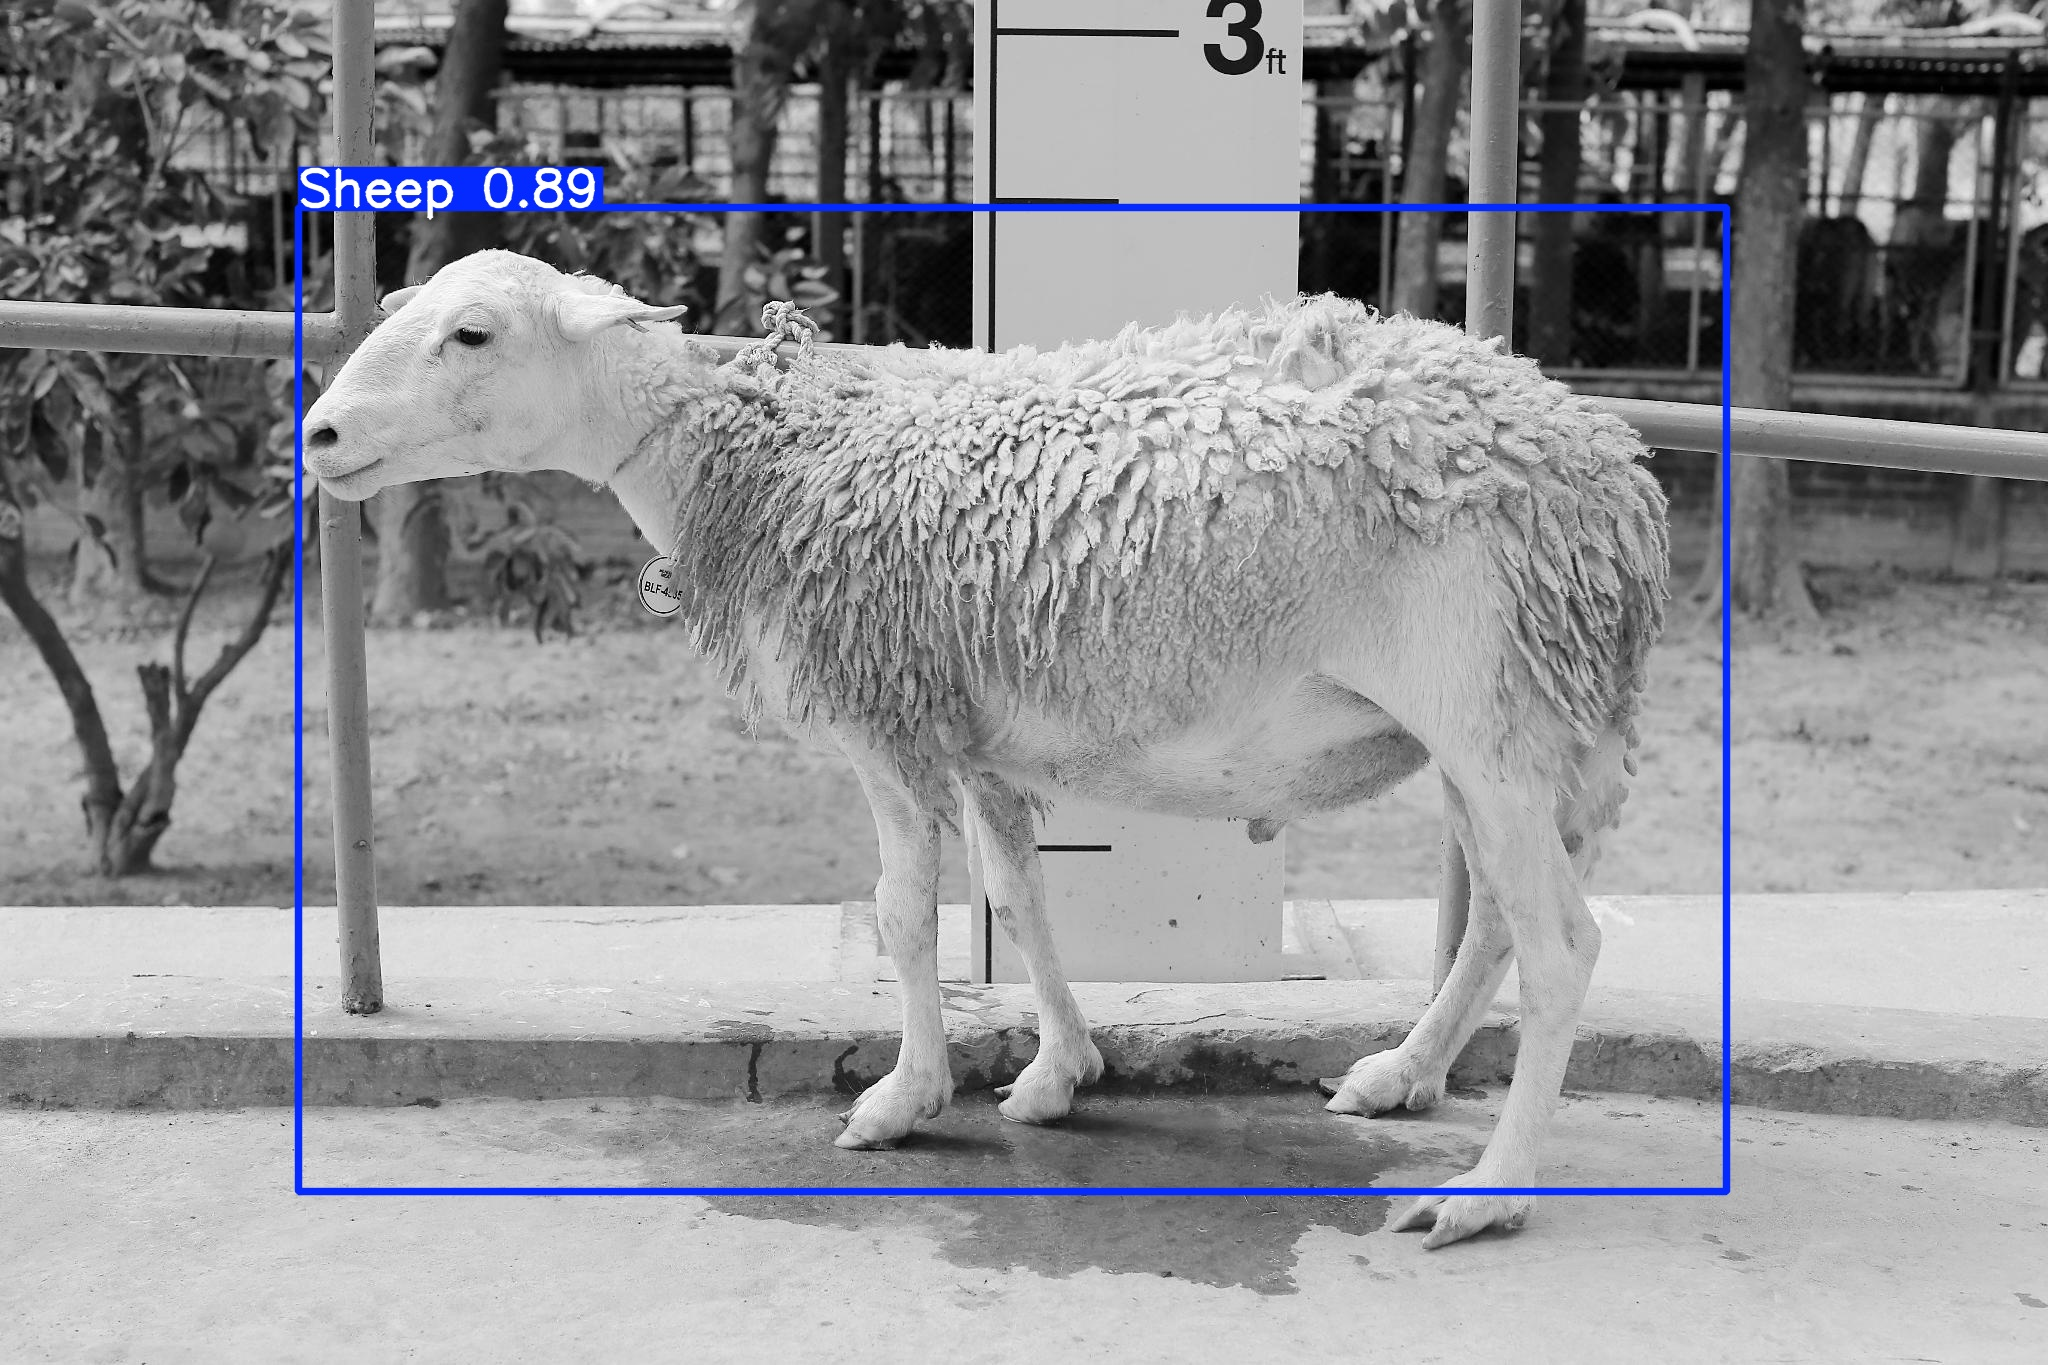

In [36]:
Image("/kaggle/working/runs/detect/predict/2024-BLFS-4585-1-_JPG.rf.5f959b778bdfdccd96b7f83936a4178b.jpg", height=600, width=1000)

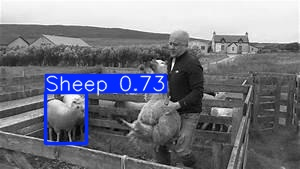

In [37]:
Image("/kaggle/working/runs/detect/predict/sheep-1095-_jpeg.rf.1fd6321f3327722bf47abe4a0d2ad952.jpg", height=600, width=1000)

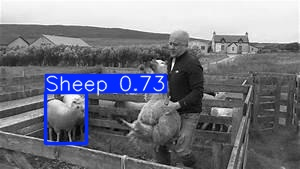

In [38]:
Image("/kaggle/working/runs/detect/predict/sheep-1095-_jpeg.rf.1fd6321f3327722bf47abe4a0d2ad952.jpg", height=600, width=1000)

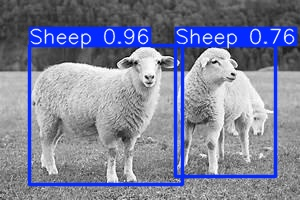

In [39]:
Image("/kaggle/working/runs/detect/predict/sheep-1161-_jpeg.rf.dc4183f5874bae237c81699c2f5f767b.jpg", height=600, width=1000)

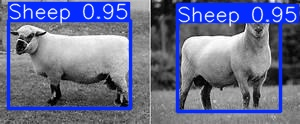

In [40]:
Image("/kaggle/working/runs/detect/predict/sheep-1392-_jpeg.rf.b05cb83b6abcd752315aa5502403fa0d.jpg", height=600, width=1000)

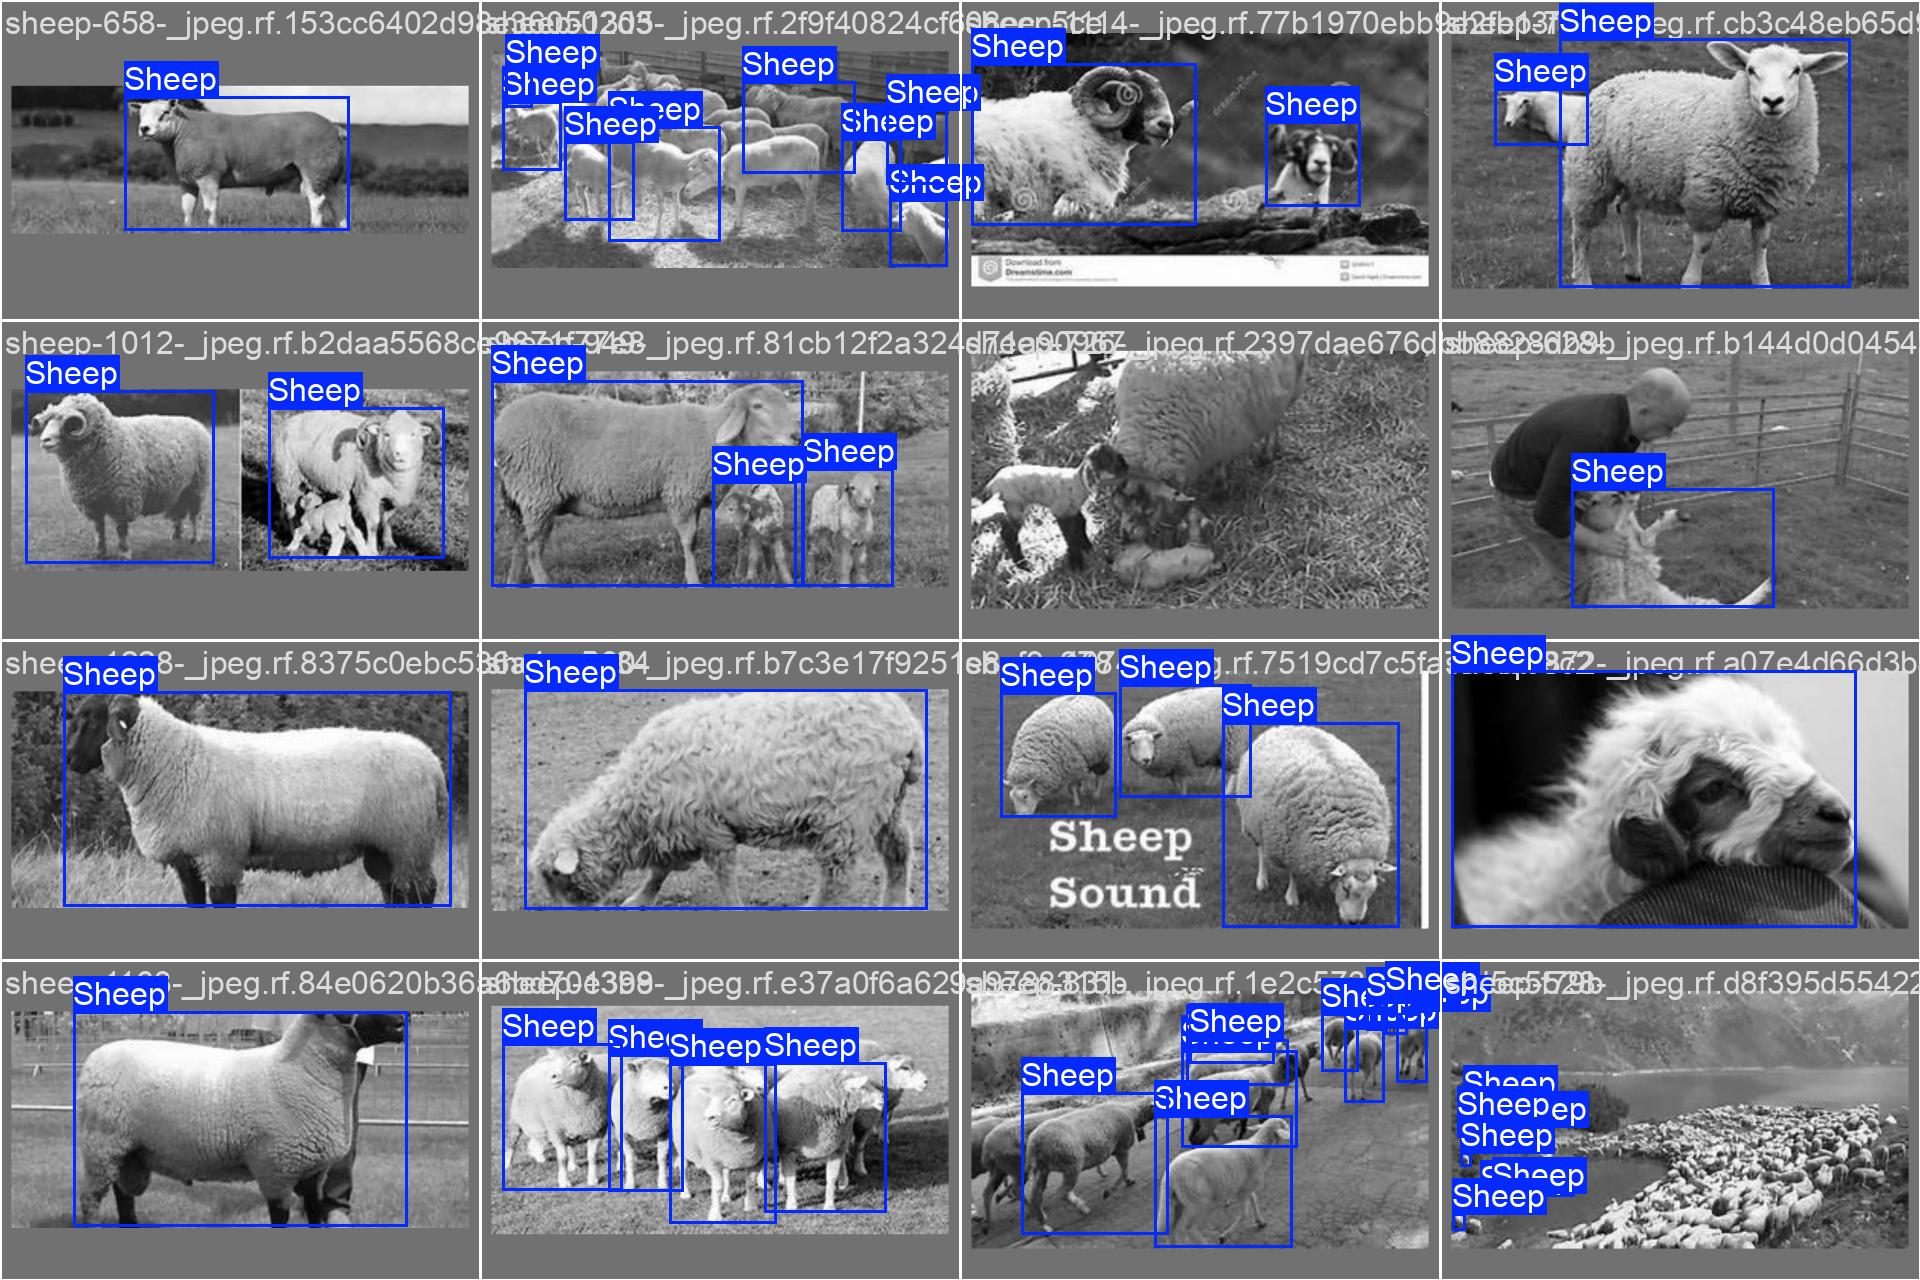

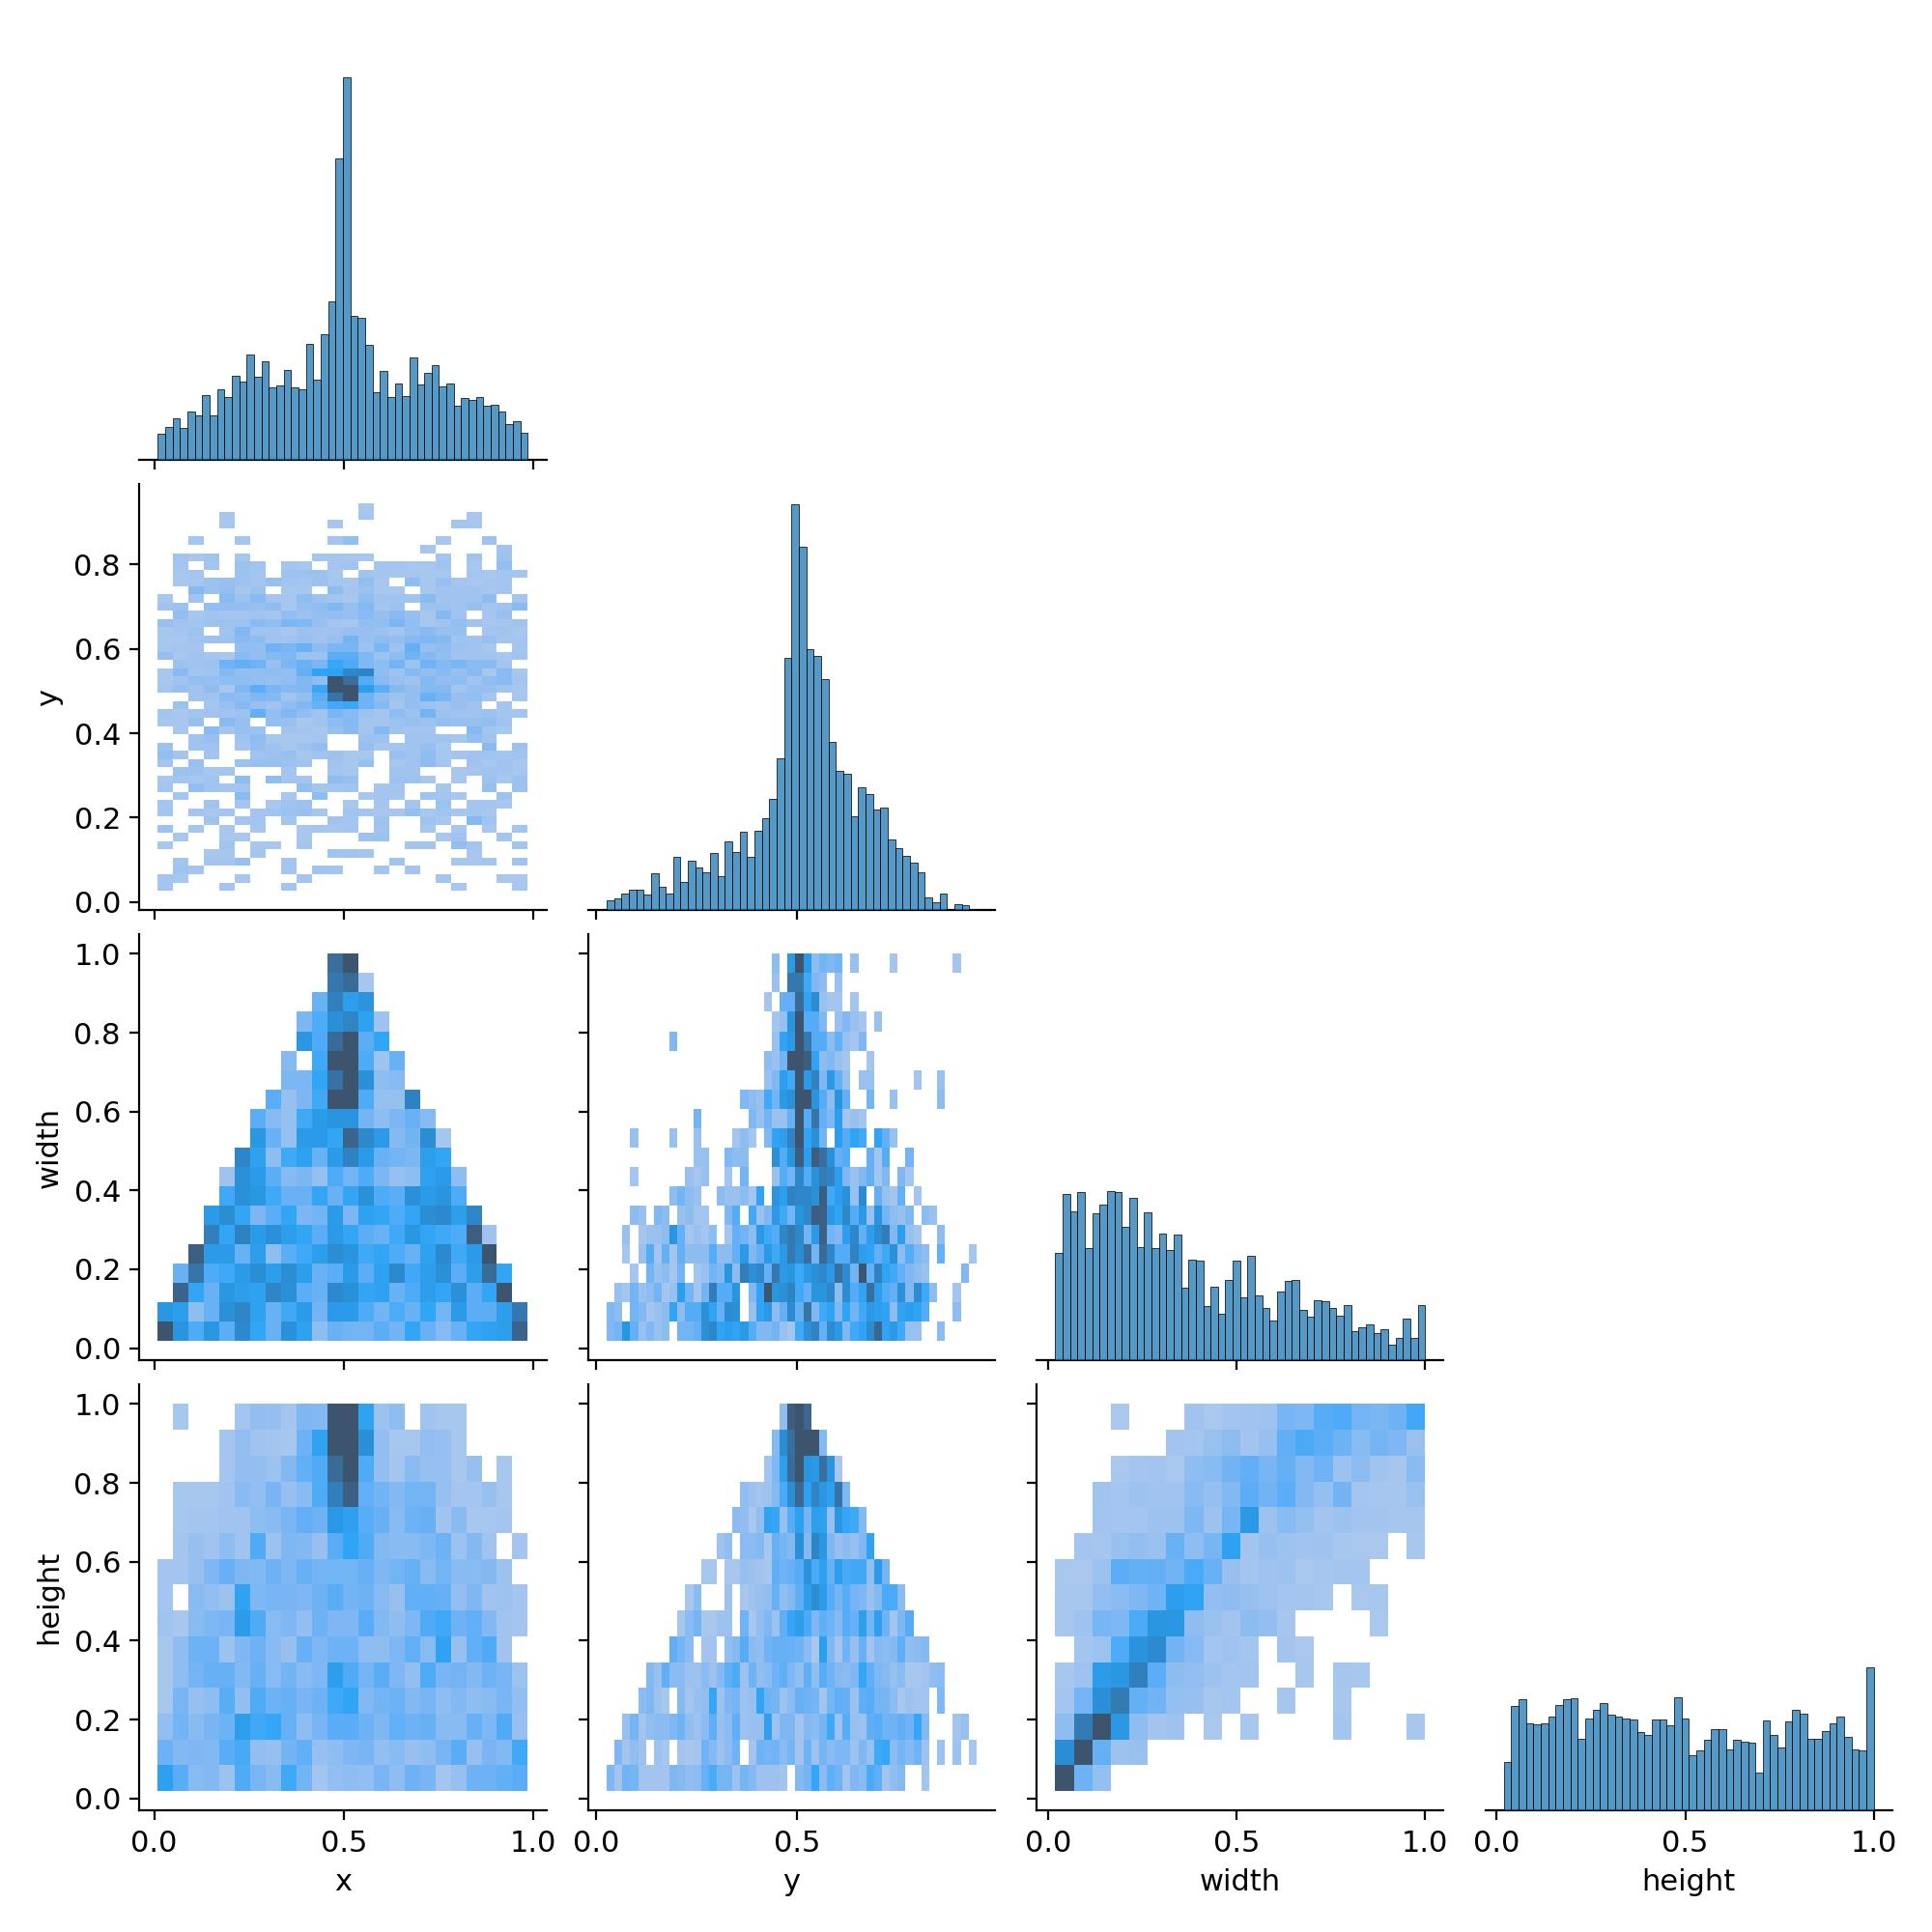

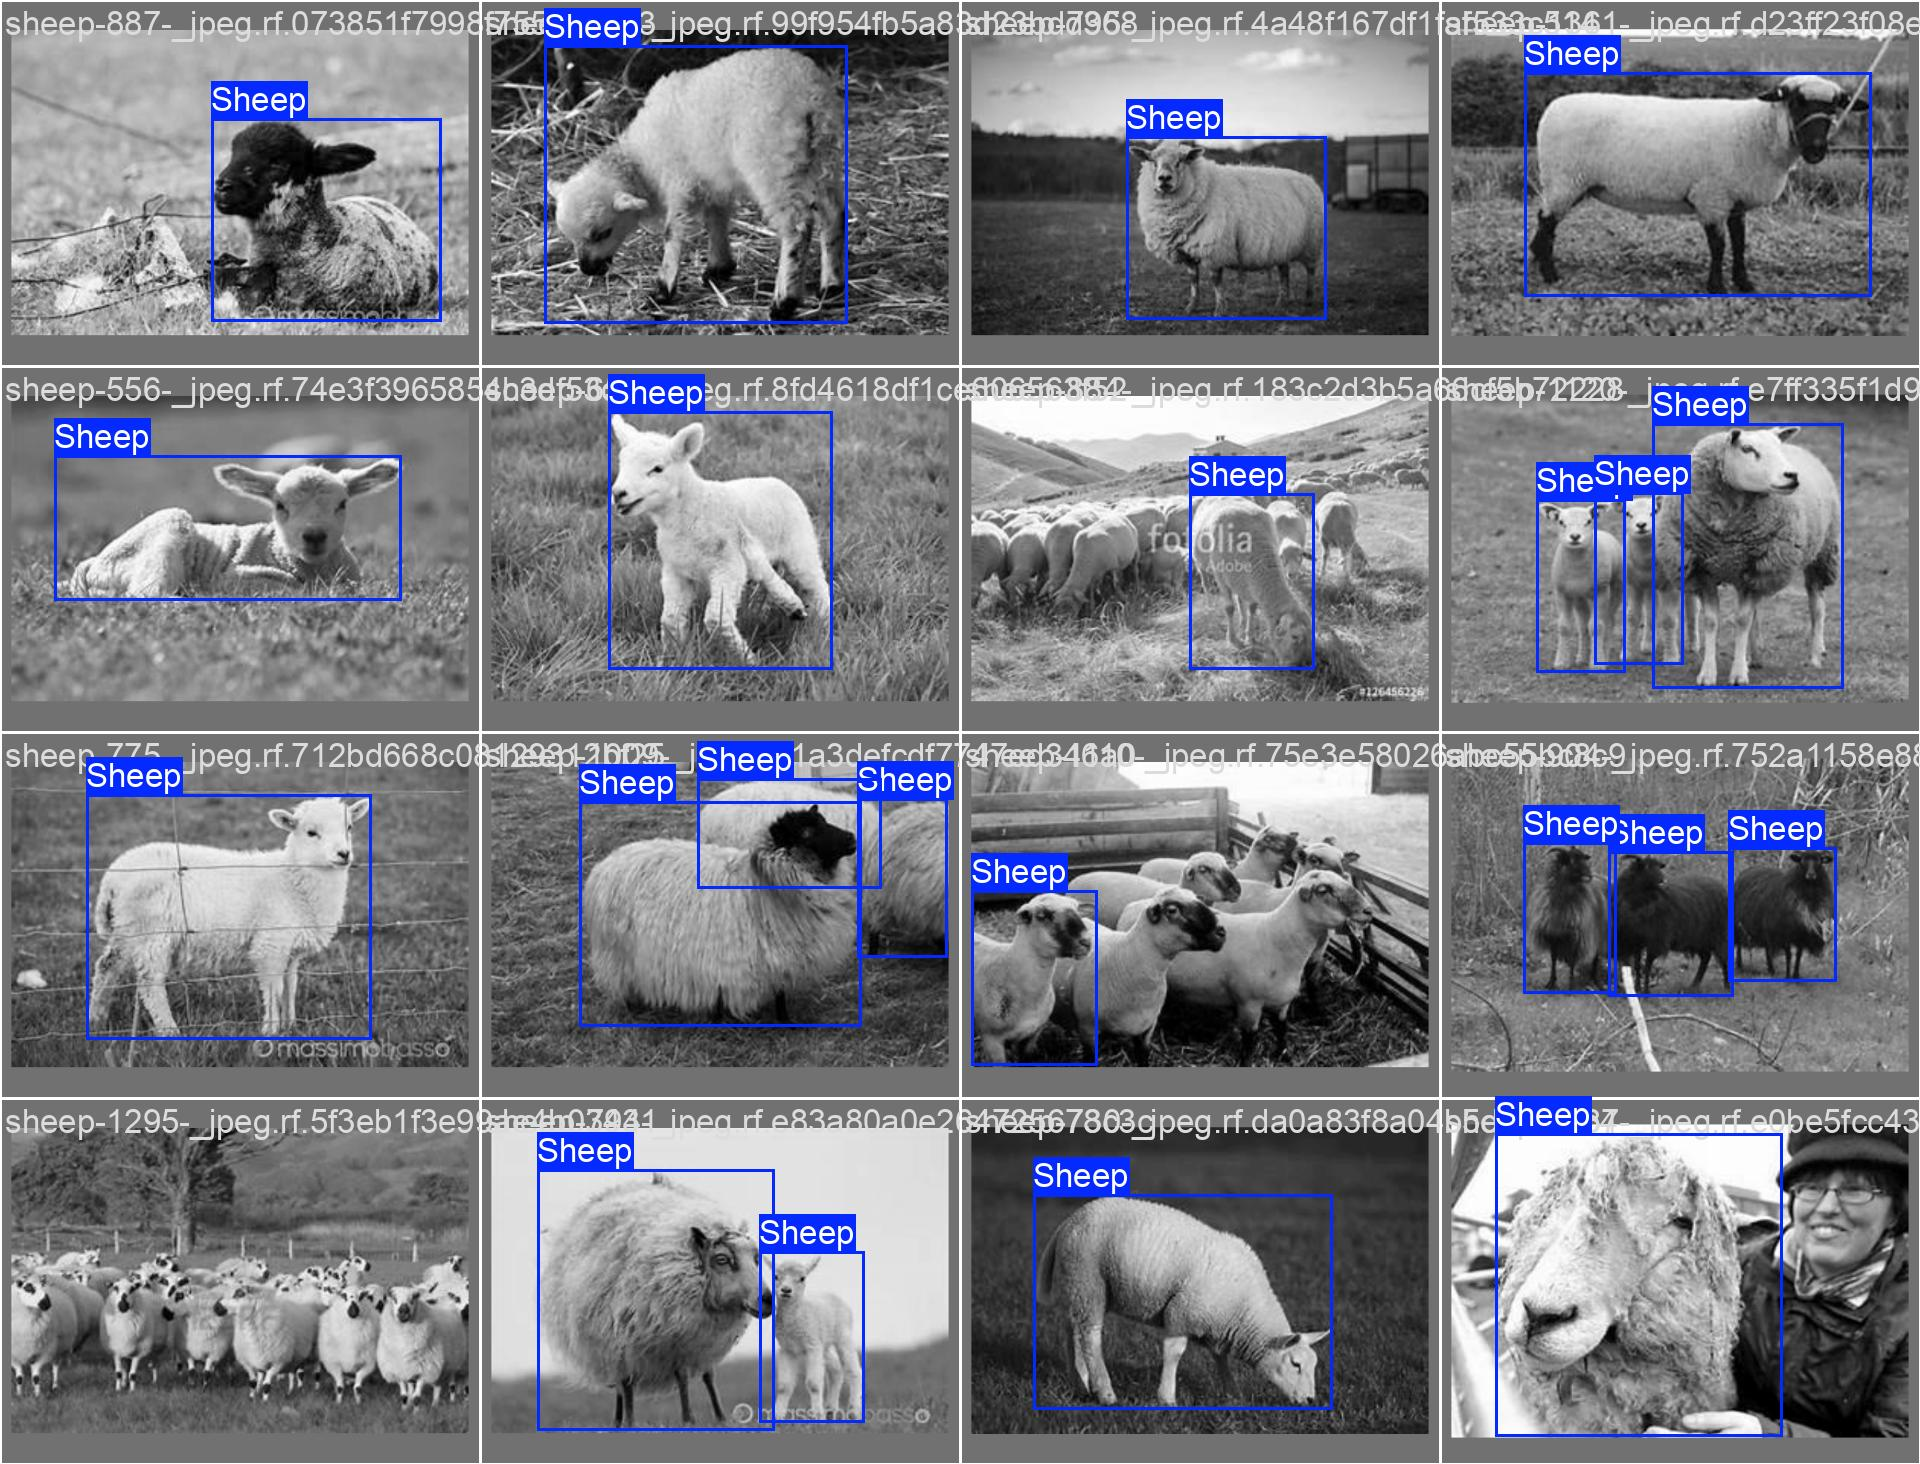

In [42]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob('/kaggle/working/runs/detect/custom_yolo11n'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[1:4]:
    display(IPyImage(filename=img, width=1000))
    print("\n")

In [43]:
!gdown "https://drive.google.com/uc?id=1ACZp9gmtjEdIY-SHp8K0xdR0D8Gjd3j3&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=1ACZp9gmtjEdIY-SHp8K0xdR0D8Gjd3j3&confirm=t
To: /kaggle/working/image2.jpg
100%|██████████████████████████████████████| 77.7k/77.7k [00:00<00:00, 86.8MB/s]


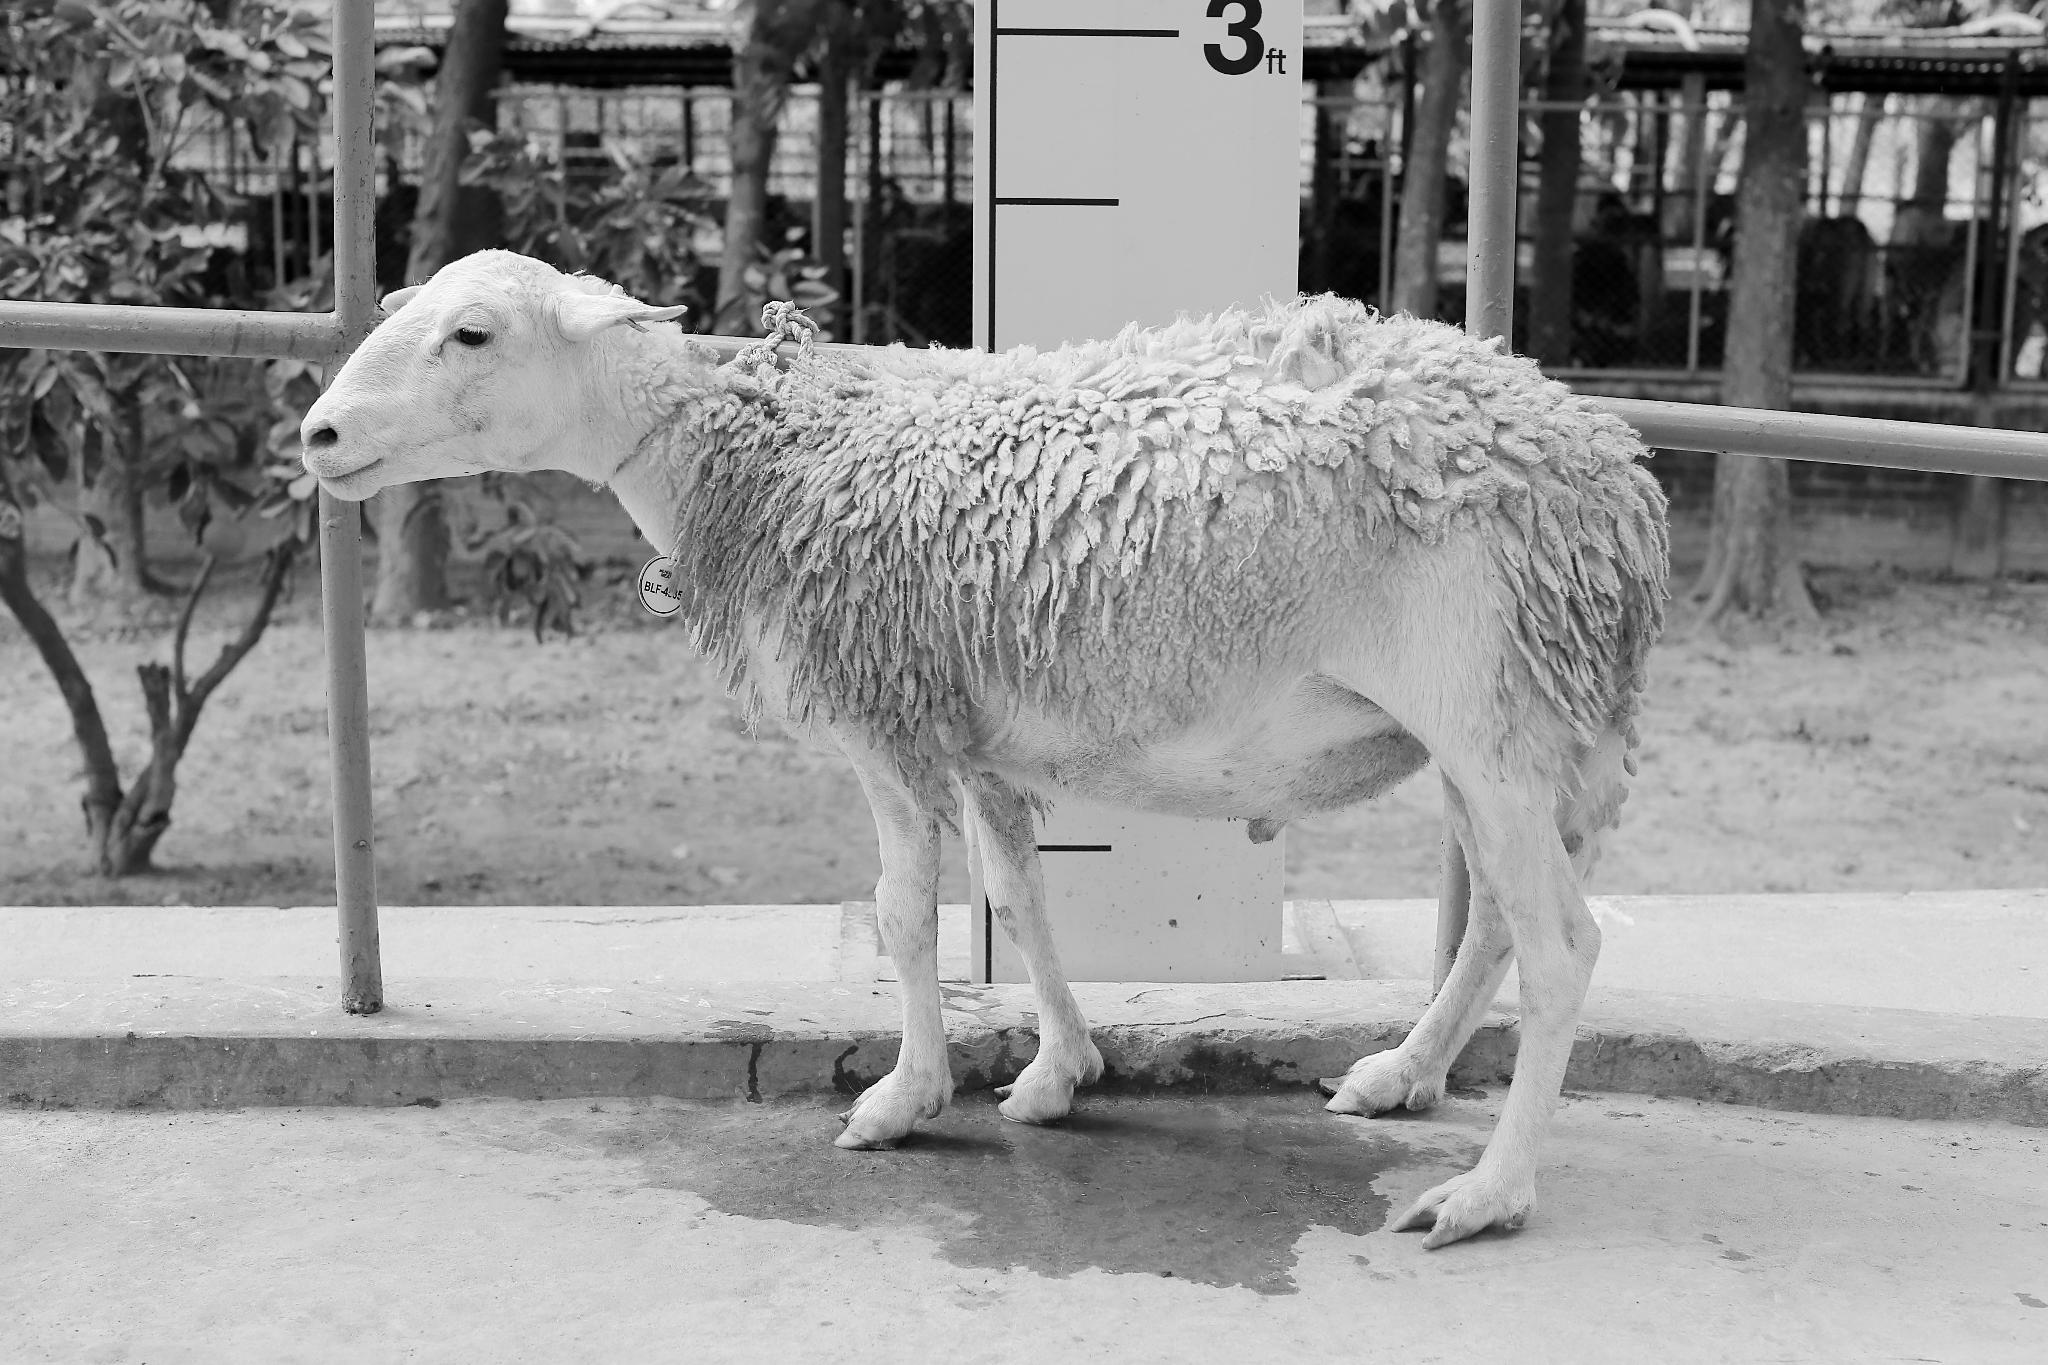

In [44]:
Image("/kaggle/working/Sheep-1/test/images/2024-BLFS-4585-1-_JPG.rf.5f959b778bdfdccd96b7f83936a4178b.jpg", width=600)

## Step # 06 Inference with Custom Model on Videos

In [45]:
!gdown "https://drive.google.com/uc?id=1Nyl18zr7zOJHh8uHtSic3dsJSY4LI_t-&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=1Nyl18zr7zOJHh8uHtSic3dsJSY4LI_t-&confirm=t
To: /kaggle/working/PPE_Part1.mp4
100%|██████████████████████████████████████| 14.2M/14.2M [00:00<00:00, 58.2MB/s]


In [46]:
!gdown "https://drive.google.com/uc?id=1SxcrDanPAr-PZfJjWBxoa2t8lUSM2dZn&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=1SxcrDanPAr-PZfJjWBxoa2t8lUSM2dZn&confirm=t
To: /kaggle/working/PPE_Part2.mp4
100%|██████████████████████████████████████| 11.1M/11.1M [00:00<00:00, 49.1MB/s]


In [ ]:
#!yolo task=detect mode=predict model= "/content/runs/detect/custom_yolo11n/weights/best.pt" conf=0.25 source="PPE_Part1.mp4" save=True